<div id= 'main'>
    <h1><p style= 'text-align:center;'>Research</p></h1>
</div>

<html>

<h2>Chapters - Table of Content</h2>


<div id = 'toc' class='alert alert-block alert-info' style='margin-top: 20px'>
    <ol>
        <li><a href='#course1'>Chapter 1 - Research</a><br><br>
            <ol>
                <li><a href = '#1.1' style='text-decoration: none;'>Section 1.1 - EDA</a></li>
                <li><a href = '#1.2'>Chapter 1.2 - Data Cleaning</a></li>
                <li><a href = '#1.3'>Chapter 1.3 - Individual Clustering</a></li>
                <li><a href = '#1.4'>Chapter 1.4 - Hyper-parameter tuned model results</a></li>
                <li><a href = '#1.5'>Chapter 1.5 - Post Clustering analysis for HDBSCAN</a></li>
                <li><a href = '#1.6'>Chapter 1.6 - HDBSCAN Cluster's analytical plots for different number of Clusters</a></li>
            </ol>
        </li><p><hr><p> <!-- course 1 finnito -->
    </ol>    
</div>
</html>

<br> <hr> <br> <br>

<div id= '1'></div>

# Chapter 1  - Research

<br>
<div id= '1.1'></div>

### Section 1.1 - EDA

*[Go to top](#toc)*

In [3]:
gri_df = pd.read_csv( 'dataset/obsvData_watershed_Sjoin.csv' )

In [5]:
gri_df.shape

(189, 45)

In [4]:
# normalize some features
feature_to_norm = [  'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix',
                     'v11_water', 'v21_urban', 'v31_barren', 'v41_forest', 'v52_rangeland', 'v81_hayPasture',
                     'v82_argo', 'v90_wetland',
                     'r11_water', 'r21_urban', 'r31_barren', 'r41_forest', 'r52_rangeland', 'r81_hayPasture',
                     'r82_argo', 'r90_wetland', 'c1', 'c2', 'c3'  ]

xNorm_df = pd.DataFrame(  data= sklearn.preprocessing.MinMaxScaler().fit_transform(gri_df[feature_to_norm]),
                          columns= feature_to_norm  )

xNorm_df.head(3)

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,c1,c2,c3
0,0.046827,0.025813,0.011015,0.032936,0.108785,0.178151,0.014064,0.735529,0.371023,0.129965,0.036629,0.053545,0.386077,0.582000,0.392055,0.054222,0.087908,0.103418,0.014291,0.068048,0.097712,0.722270,0.534464,0.078746,0.144189,0.133549,0.738334,0.645543,0.316312
1,0.230064,0.168260,0.128970,0.046242,0.046244,0.077129,0.014064,0.738341,0.558592,0.242087,0.048989,0.046608,0.016516,0.830217,0.138745,0.005132,0.022783,0.268051,0.016694,0.051486,0.003617,0.895873,0.164473,0.006484,0.032491,0.307013,0.582842,0.588988,0.299624
2,0.005514,0.039197,0.004171,0.001150,0.002338,0.015647,0.014059,0.280951,0.493619,0.122511,0.026384,0.115974,0.434559,0.920174,0.371010,0.123580,0.013458,0.066853,0.007886,0.119762,0.089403,0.928032,0.411004,0.145871,0.017938,0.067474,0.776834,0.785712,0.500902


In [5]:
# distribution prior to normalization
ncol = 10
nrow = math.ceil(  len(feature_to_norm)/ncol )

fg, ax = plt.subplots( nrow,ncol, figsize= (22,3*nrow) )
for e_c, e_ax in zip( feature_to_norm, ax.flatten() ):
    sns.boxenplot( y= gri_df[e_c], ax= e_ax )
plt.tight_layout(); plt.show()

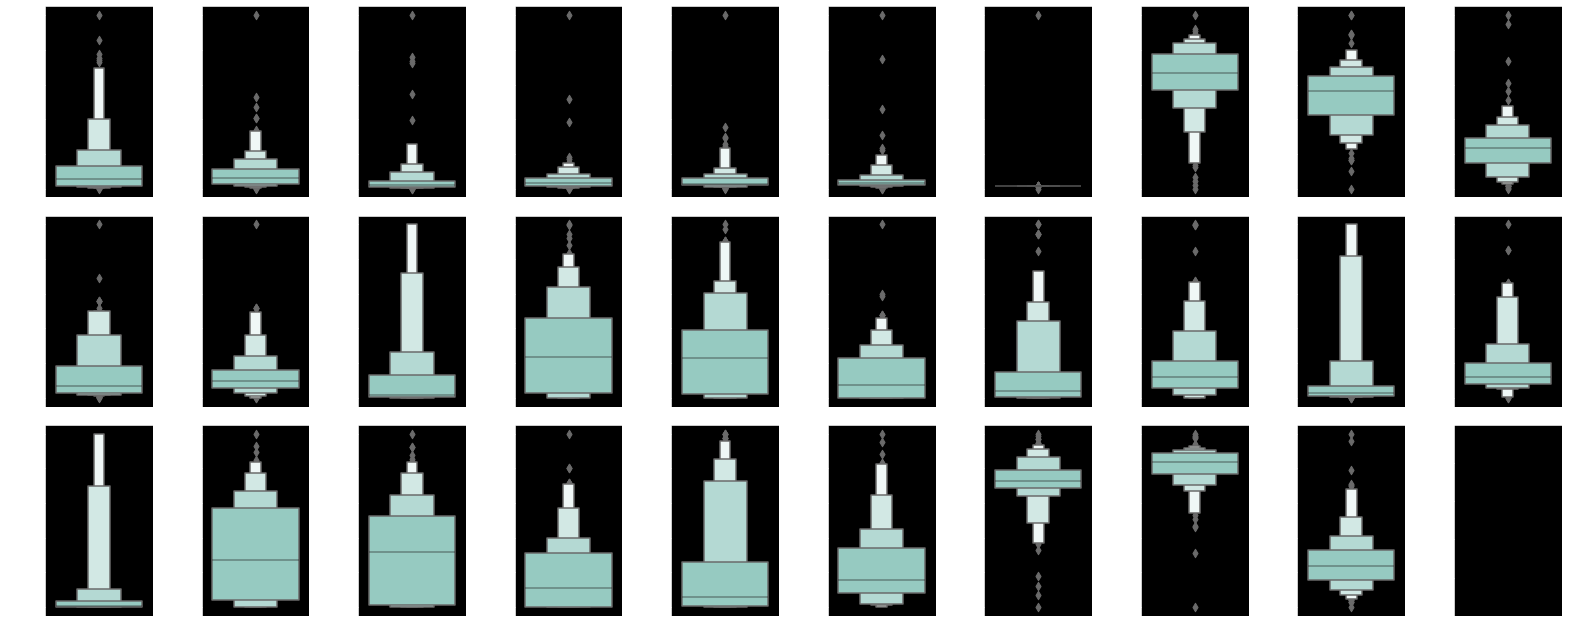

In [8]:
# distribution of  normalization
ncol = 10
nrow = math.ceil(  len(feature_to_norm)/ncol )

fg, ax = plt.subplots( nrow,ncol, figsize= (22,3*nrow) )
for e_c, e_ax in zip( feature_to_norm, ax.flatten() ):
    sns.boxenplot( y= xNorm_df[e_c], ax= e_ax )
plt.tight_layout(); plt.show()

<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Based on this we need to normalize all the columns except the ratios (r11_water, r21_urban, etc.) and c's (c1,c2,c3). But before that we need to fix some data issue - by imputing various features for bad data.
</b></p>
</div>


<br>
<div id= '1.2'></div>

### Section 1.2 - Data Cleaning

*[Go to top](#toc)*


### `missingpy` library

`Missingpy` is a library in python used for imputations of missing values. Currently, it supports `K-Nearest Neighbours` based imputation technique and `MissForest` i.e `Random Forest`-based imputation technique.

#### ` KNNImputer`
KNNImputer is a multivariate data imputation technique used for filling in the missing values using the K-Nearest Neighbours approach. The mean value fills each missing value from the n nearest neighbours found in the training set, either weighted or unweighted.
If a sample has more than one feature missing, then the neighbour for that sample can be different. If the number of neighbours is lesser than n_neighbour specified, there is no defined distance in the training set. The average of that training set is used during imputation.
Nearest neighbours are selected based on distance metrics; by default, it is set to euclidean distance, and n_neighbour are specified to consider for each step.

#### `MissForest`

It is another technique used to fill in the missing values using Random Forest in an iterated fashion. The candidate column is selected from all the columns having the least number of missing values.
In the first step, all the other columns, i.e. non-candidate columns having missing values, are filled with the mean for the numerical columns and the categorical columns. After that, imputer fits a random forest model with the candidate columns as the outcome variable(target variable) and remaining columns as independent variables and then filling the missing values in the candidate column using the predictions from the fitted Random Forest model.
Then the imputer moves on, and the next candidate column is selected with the second least number of missing values, and the process repeats itself for each column with the missing values.   

<br><p>
<b>
Based on the above imputation techniques, we will choose `MissForest` instead of `KNNImputer` as `KNNImputer` has following shortcomings: </b>
    
- is sensitive to outliers because it uses Euclidean distance below the surface
- can’t be directly applied to categorical data, as some form of conversion to numerical representation is required
- if the number of neighbours is lesser than n_neighbour specified, there is no defined distance in the training set

    <b> `MissForrest` works well as it:</b>
    
- doesn’t require extensive data preparation — as a Random forest algorithm can determine which features are important
- doesn’t require any tuning — like K in K-Nearest Neighbors
- doesn’t care about categorical data types — Random forest knows how to handle them

<br>

<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Imputing data using MissForest
</b></p>
</div>

In [29]:
# !pip install missingpy

  Using cached missingpy-0.2.0-py3-none-any.whl (49 kB)


In [5]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import missingpy

In [6]:
gri_df = pd.read_csv( 'dataset/obsvData_watershed_Sjoin.csv' )

## replacing outliers and illegit values with nan and then imputing 
toReplace_dictn = {  'a254'     :  list( gri_df.loc[ (gri_df['a254']<0) | (gri_df['a254']>=400), 'a254' ] ) ,
                     'a440'     :  list( gri_df.loc[ (gri_df['a440']<0) | (gri_df['a440']>=20), 'a440' ] ),
                     'sr'       :  list( gri_df.loc[ (gri_df['sr']<0) | (gri_df['sr']>=20), 'sr' ] ),
                     'no3_no2'  :  list( gri_df.loc[ gri_df['no3_no2']<0, 'no3_no2' ] ),
                     'no2'      :  list( gri_df.loc[ gri_df['no2']<0, 'no2' ] ),
                     'po4'      :  list( gri_df.loc[ (gri_df['po4']<0) | (gri_df['po4']>=900), 'po4' ] ),
                     'nh4'      :  list( gri_df.loc[ (gri_df['nh4']<0) | (gri_df['nh4']>=1500), 'nh4' ] )
                  }

griNAN_df =   gri_df.replace( to_replace= toReplace_dictn, value= np.nan )

## converting categorical col (waterbody) into OHE

OHEncoder_obj = sklearn.preprocessing.OneHotEncoder( sparse= False, drop= 'first', dtype= int )
OHEncoder_np = OHEncoder_obj.fit_transform( griNAN_df[['waterbody_type']] )
OHEncoder_df = pd.DataFrame( OHEncoder_np, index= griNAN_df.index,
                             columns= OHEncoder_obj.get_feature_names_out( ['waterbody_type'] )  )

griNAN_df = griNAN_df.merge( OHEncoder_df, left_index= True, right_index= True )
griNAN_df.rename(  columns= { 'waterbody_type_MS Sound': 'waterbody_type_MSSound' }, inplace= True  )

# feature column
featureCol_ls = [  'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix', 'c1', 'c2', 'c3',
                   'v11_water', 'v21_urban', 'v31_barren', 'v41_forest', 'v52_rangeland', 'v81_hayPasture', 'v82_argo','v90_wetland',
                   'r11_water', 'r21_urban', 'r31_barren', 'r41_forest', 'r52_rangeland', 'r81_hayPasture',
                   'r82_argo', 'r90_wetland', 
                   'waterbody_type_MSSound', 'waterbody_type_River'                
                ]

## impute NAN values
import sklearn.neighbors._base, missingpy
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
gri_imputed_df = missingpy.MissForest( max_iter= 200, n_estimators= 150, criterion= 'squared_error',
                                       missing_values= np.nan, n_jobs= -1 )\
                                .fit_transform( griNAN_df[featureCol_ls] )
gri_imputed_df = pd.DataFrame( gri_imputed_df, columns= featureCol_ls, dtype= float )
gri_imputed_ori_df = gri_imputed_df.copy()

## normalize
feature_to_norm = [  'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix',
                     'v11_water', 'v21_urban', 'v31_barren', 'v41_forest', 'v52_rangeland', 'v81_hayPasture',
                     'v82_argo', 'v90_wetland' ]

gri_imputed_df[feature_to_norm] = pd.DataFrame(
                    data= sklearn.preprocessing.MinMaxScaler().fit_transform( gri_imputed_df[feature_to_norm] ),
                    columns= feature_to_norm  )
griNAN_df[feature_to_norm] = gri_imputed_df[feature_to_norm]

## final data
griFeature_df = gri_imputed_df.copy()
griAll_df = griNAN_df.copy()

# providing appt size of the features
griFeature_df = griFeature_df.astype( dtype= float )
griFeature_df[ ['waterbody_type_MSSound','waterbody_type_River'] ] = griFeature_df[
                        ['waterbody_type_MSSound','waterbody_type_River'] ].astype( dtype= int )

## del redundant & unused data
del OHEncoder_obj, OHEncoder_np, OHEncoder_df, gri_imputed_df, griNAN_df

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [259]:
gri_imputed_ori_df

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River
0,304.444059,26.591992,3.312396,68.187420,121.156454,11.503516,1.151034,0.666141,1.408231,0.594660,0.546703,0.652694,0.325869,1.4400,3.2166,1.9566,49.6332,16.0956,3.3759,11.2581,10.8963,0.01471,0.03287,0.01999,0.50712,0.16446,0.03449,0.11503,0.11133,0.0,1.0
1,1643.749899,168.099378,54.056463,97.410600,55.505064,10.266544,1.135026,0.668627,1.481018,0.666406,0.439591,0.610412,0.313605,1.9080,2.7999,0.0837,70.8012,5.6961,0.3195,2.9178,28.0332,0.01695,0.02487,0.00074,0.62901,0.05061,0.00284,0.02592,0.24905,0.0,1.0
2,2.480196,39.887988,0.368044,139.981437,9.415355,0.653591,0.823742,0.264225,1.455805,0.589890,0.573224,0.757488,0.461521,1.0521,6.9669,2.2023,78.4728,15.2316,7.6941,1.7235,7.0902,0.00874,0.05785,0.01829,0.65159,0.12647,0.06389,0.01431,0.05887,0.0,1.0
3,63.244998,31.340562,1.012121,164.908930,9.591534,1.028520,1.109408,0.311341,1.521157,0.640301,0.593086,0.818897,0.343580,0.1683,3.7170,0.1692,85.2804,16.6662,11.9781,0.8541,2.6280,0.00139,0.03060,0.00139,0.70212,0.13721,0.09862,0.00703,0.02164,0.0,1.0
4,5026.117194,253.573638,310.261092,151.527600,54.525598,13.705153,1.360987,0.657816,1.565815,0.804842,0.320858,0.566479,0.303350,2.5731,16.4565,0.0072,0.2961,0.1746,0.1260,66.7962,7.4646,0.02740,0.17527,0.00008,0.00315,0.00186,0.00134,0.71140,0.07950,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,22.321764,88.323402,1.006907,161.268660,17.682664,0.214870,0.949754,0.430103,1.509212,0.770287,0.507432,0.849491,0.424386,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
185,17.708599,88.323402,0.991265,136.916010,18.889667,0.722681,1.134163,0.510654,1.519170,0.798695,0.505350,0.862956,0.356807,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
186,3.720294,118.714250,1.150138,173.715570,17.761657,0.207961,0.882370,0.420601,1.522595,0.755397,0.509764,0.843260,0.426950,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0
187,21.077532,101.619398,2.070248,165.598020,21.436324,1.930375,1.412073,0.284295,1.524893,0.775745,0.500047,0.826222,0.615844,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0


In [12]:
print( plt.style.available )

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


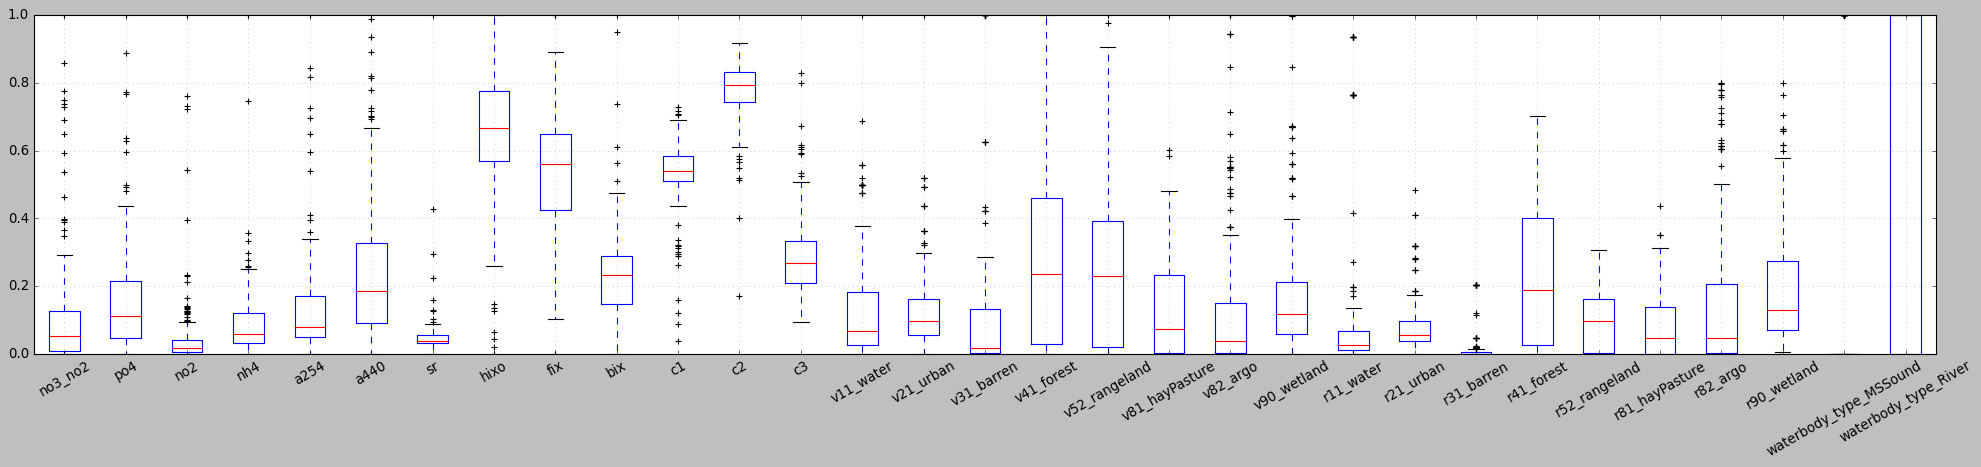

In [231]:
fg,ax = plt.subplots( figsize= (25,6) )

# plt.style.context( style= 'seaborn-darkgrid' );
plt.style.use( 'classic' )
matplotlib.pyplot.grid( which= 'both', axis= 'both', alpha= 0.3 )                           # grid transparency

griFeature_df.boxplot( figsize= (25,6), ax= ax )

ax.set_xticklabels( labels= griFeature_df.columns, rotation= 30 )
plt.tight_layout(); plt.show()

<br><hr>
<div id= '1.3'></div>

### Section 1.3 - Individual Clustering

*[Go to top](#toc)*


### K-means

[Reference - Implementation of k means, Hierarchical & DBSCAN clustering](https://medium.com/analytics-vidhya/practical-implementation-of-k-means-hierarchical-and-dbscan-clustering-on-dataset-with-bd7f3d13ef7f)

K-means is a Convex clustering. Convex clustering is one method that can be used to cluster observations. Instead of directly assigning each observation to a cluster, it assigns each observation to a point called the “cluster centroid”. Two observations are then said to belong to the same cluster if they share the same cluster centroid.

#### The (Classificaton) problem is Convex if:
    
    - any portion of a line drawn between any randomly choosen 2 points on the curve is above the line
    
<br>
<table><tr>    
<td> <h3><p style= 'text-align:center;'>Convex (Classification) problem</p></h3> <img src= 'images/convex_problem.png' alt="Drawing" style= 'width:977px;height:320px;'> </td>
</tr></table>

<br>

<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
    
#### Using Pricipal Components (PCs) for Clustering
</b></p>
Using PCs for clustering  yields better result (research paper available)
</div>

In [7]:
# pca
pca_obj = sklearn.decomposition.PCA( random_state= 10 )
pc_df = pca_obj.fit_transform( griFeature_df )

# pc col nomenclature 
colNm_ls = [  ('pc_'+str(e_colm[0]+1)) for e_colm in enumerate( griFeature_df.columns )  ]

pc_df = pd.DataFrame( pc_df, columns= colNm_ls  );  

pcth = 18
pc_df = pc_df.iloc[ :, :pcth ]
xx = pc_df.to_numpy()

pc_df.head(3)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
0,-0.429958,-0.328515,0.116974,-0.028362,0.220083,-0.090315,-0.016470,-0.352765,-0.271782,0.021384,0.163076,0.103390,0.133771,-0.091140,0.006039,-0.038254,-0.034429,0.003590
1,-0.525303,-0.223839,-0.017152,-0.035176,0.332065,-0.002000,0.144669,-0.242372,0.141000,-0.386340,0.216565,-0.122856,0.197625,-0.043418,0.063711,-0.060634,-0.097933,-0.156344
2,-0.416360,-0.643991,-0.256157,-0.181668,-0.192635,-0.145621,-0.239836,-0.145339,-0.200242,-0.253183,0.296745,-0.163148,0.033341,-0.116675,0.078708,-0.235691,0.093611,-0.065405


In [26]:
# pcth = 18

print(  'explained_variance_ratio --> \t\t', list( pca_obj.explained_variance_ratio_[:pcth+2].round(3) ),
        '\n\nexplained_variance_ratio cumu --> \t',
        list( np.cumsum( pca_obj.explained_variance_ratio_[:pcth+2] ).round(3) ) 
     )
plt.style.use( 'dark_background' )
plt.style.use( 'classic' )


fg,ax = plt.subplots( figsize= (10,4) )

ax.plot(  pca_obj.explained_variance_ratio_.cumsum()  )
ax.hlines( y= 0.98, xmin= 0, xmax= 30, linestyle= '--' )
ax.set_xticks( ticks= np.linspace(0,30,31) )
ax.set_ylabel( 'Cumulative Variance', fontsize= 18 ); ax.set_xlabel( 'Principal Components', fontsize= 18 )
plt.tight_layout(); plt.show()

explained_variance_ratio --> 		 [0.347, 0.156, 0.107, 0.082, 0.063, 0.038, 0.036, 0.027, 0.025, 0.021, 0.015, 0.013, 0.012, 0.009, 0.009, 0.007, 0.006, 0.005, 0.005, 0.004] 

explained_variance_ratio cumu --> 	 [0.347, 0.504, 0.611, 0.693, 0.757, 0.794, 0.83, 0.857, 0.882, 0.903, 0.918, 0.932, 0.944, 0.953, 0.962, 0.969, 0.975, 0.98, 0.985, 0.989]


based on this plot lets consider 18 Principal Components

In [28]:
clust_range = range(2,20)

warnings.filterwarnings( action= 'ignore' )

minIntraClustDist_Inertia, silScore = [], []    # cluster inertia, silhouette_score

for e_clustNo in clust_range:
    
    kmeansClust_fit = sklearn.cluster.KMeans( n_clusters= e_clustNo, init= 'k-means++',
                                              n_init= 3*len(griFeature_df.columns), max_iter= 1000, 
                                              algorithm= 'full'  )\
                                        .fit( pc_df )
    
    minIntraClustDist_Inertia.append( kmeansClust_fit.inertia_ )
    
    silScore.append(  sklearn.metrics.silhouette_score( X= pc_df, labels= kmeansClust_fit.labels_,
                                                        metric= 'euclidean' )  )

In [29]:
# computing data for plots

inertia_df = pd.DataFrame(  { 'inertia': minIntraClustDist_Inertia, 'silScore': silScore }  )
inertia_df['ipercent_diff'] = inertia_df['inertia'].pct_change().mul(-100)
inertia_df['icumusum']  =  inertia_df['inertia'].pct_change().mul(-1).cumsum()
inertia_df.head(3)

,inertia,silScore,ipercent_diff,icumusum
0,152.357764,0.424675,NaN,NaN
1,122.371012,0.324614,19.681801,0.196818
2,105.598979,0.311096,13.705887,0.333877


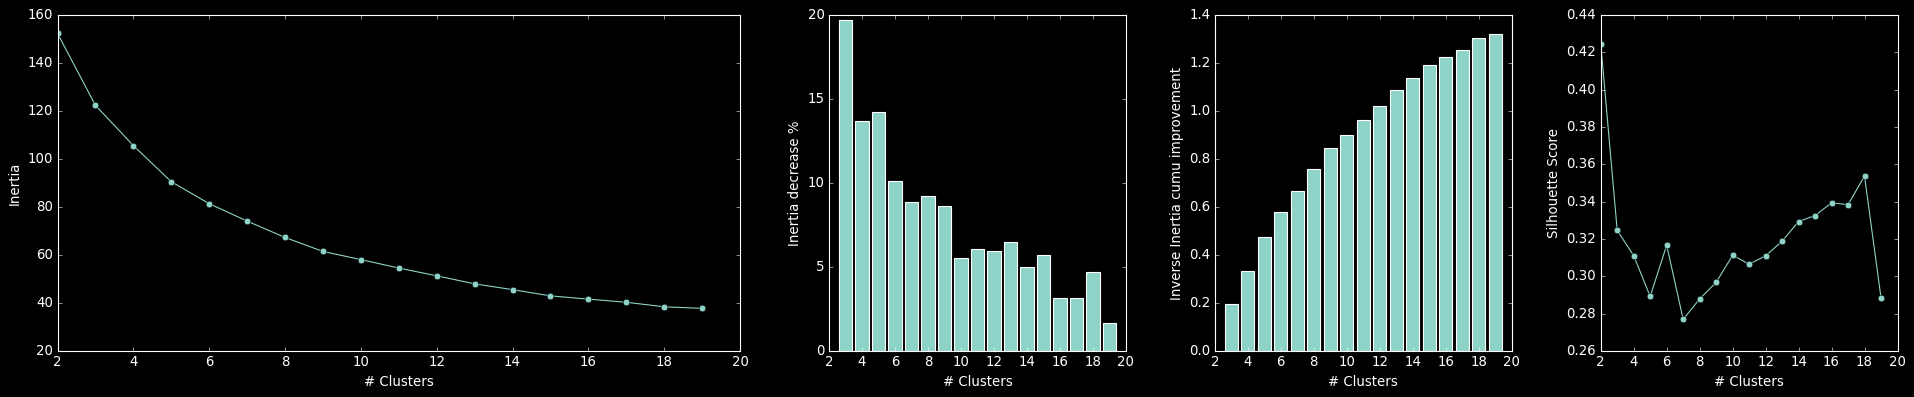

In [30]:
# score plots

from matplotlib.gridspec import GridSpec

fg = plt.figure()
gs = GridSpec( 1,5, figure= fg, top= .8, right= 3, hspace= 0.1, wspace= 0.3 )

ax1a = fg.add_subplot( gs[0,:2] ); ax1b = fg.add_subplot( gs[0,2] );
ax1c = fg.add_subplot( gs[0,3] );  ax1d = fg.add_subplot( gs[0,4] )

ax1a.plot( clust_range, inertia_df['inertia'], marker= 'o' )
ax1b.bar( x= clust_range, height= inertia_df['ipercent_diff'] )
ax1c.bar( x= clust_range, height= inertia_df['icumusum'] )
ax1d.plot( clust_range, inertia_df['silScore'], marker= 'o' )

ax1a.set( xlabel= '# Clusters', ylabel= 'Inertia' )
ax1b.set( xlabel= '# Clusters', ylabel= 'Inertia decrease %' )
ax1c.set( xlabel= '# Clusters', ylabel= 'Inverse Inertia cumu improvement' )
ax1d.set( xlabel= '# Clusters', ylabel= 'Silhouette Score' )

plt.tight_layout(); plt.show()

#### `Silhouette` coefficient plot

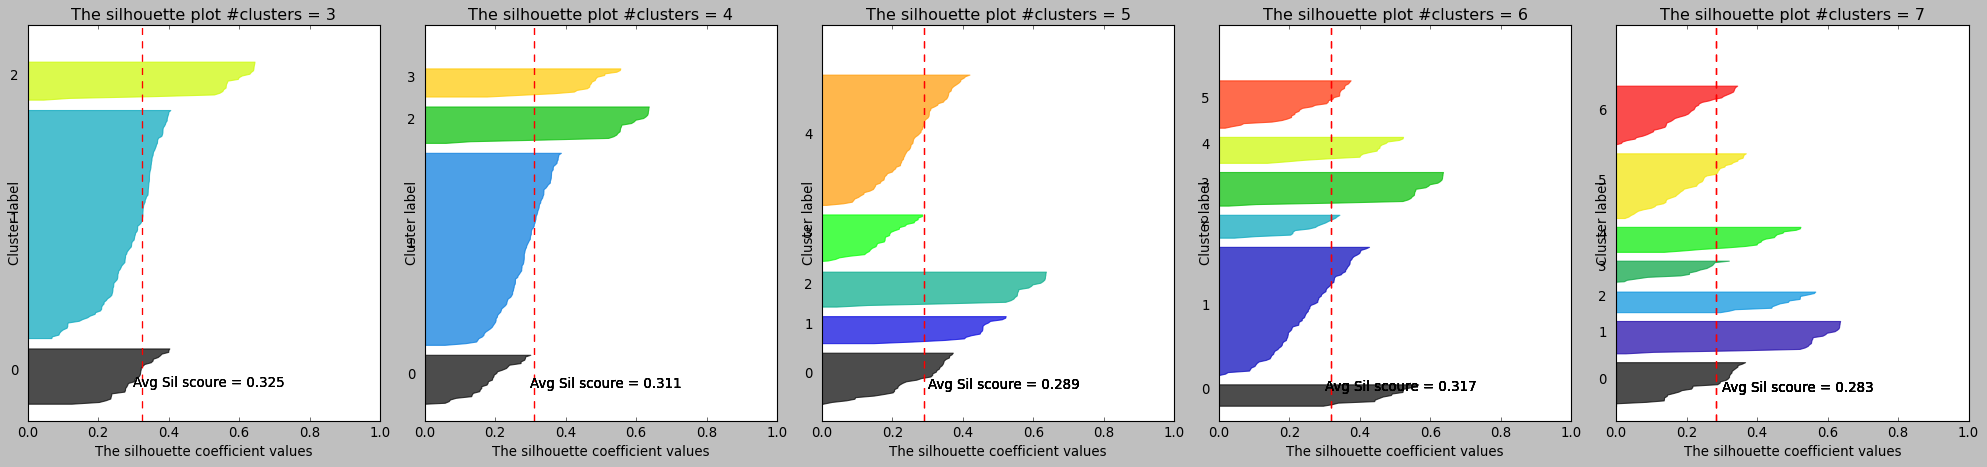

In [31]:
plt.style.use('classic'); 
# plt.style.context( style= 'seaborn-darkgrid' ); plt.style.use( 'dark_background' );

data_toPlot = pc_df.iloc[ :, :pcth ]

fg,ax = plt.subplots( 1,5, figsize= (25,6) )

for e_clusterNum, e_ax in zip( [3,4,5,6,7], ax.flatten() ):

    # The  10*(n_clust+1) is for inserting blank space between silhouette
    e_ax.set( xlim= [0,1], ylim= [ 0, data_toPlot.shape[0] + 10*(e_clusterNum+1) ] )   
    clust4_obj = sklearn.cluster.KMeans(  n_clusters= e_clusterNum, init= 'k-means++',
                                          n_init= 3*len(data_toPlot.columns), max_iter= 1000,
                                          algorithm= 'full', random_state= 10  )
    yhat = clust4_obj.fit_predict(data_toPlot)    # aka cluster_labels

    sil_avg = sklearn.metrics.silhouette_score( X= data_toPlot, labels= yhat )

    # sample_silhouette_values = silScore_xi
    silScore_xi = sklearn.metrics.silhouette_samples( X= data_toPlot, labels= yhat )

    ylower = 10

    for e_clust in range(e_clusterNum):
        # Aggregate the silhouette scores for each xi belonging to cluster i, and sort them
        clust_ith_Silscore = silScore_xi[yhat == e_clust]         # ith_cluster_silhouette_values 
        clust_ith_Silscore.sort()
        clust_ith_size = clust_ith_Silscore.shape[0]
        yupper = ylower + clust_ith_size

        color_ls = cm.nipy_spectral( float(e_clust)/e_clusterNum )
        
        e_ax.fill_betweenx( y= np.arange(ylower,yupper), x1= 0, x2= clust_ith_Silscore,
                            facecolor= color_ls, edgecolor= color_ls, alpha= 0.7  )

        # Label the silhouette plots with their cluster numbers at the middle
        e_ax.text(  x= -0.05, y= ylower + 0.5*clust_ith_size, s= str(e_clust)  )
        e_ax.text(  s=  f'Avg Sil scoure = {round(sil_avg,3)}', x= 0.3, y= 20,  )
        

        # Compute the new ylower for next plot
        ylower = yupper + 5
        # The v line for avg sil score of all the values
        e_ax.axvline( x= sil_avg, color= 'red', linestyle= '--' )
        # Clear the yaxis labels, ticks
        e_ax.set( xticks= np.arange(0,1.2,0.2), yticks= [] )                
        e_ax.set( title= 'The silhouette plot #clusters = ' + str(e_clust+1),
                  xlabel= 'The silhouette coefficient values', ylabel= 'Cluster label' )
plt.tight_layout(); plt.show()

> <h4>Based on this curve, possible cluster number = 3, 4, 5, 6</h4>

In [242]:
plt.style.use('classic'); 

clust_range = np.linspace( 3,7,5, dtype= np.int8 )

scores_cluster = []

pc_np = pc_df.to_numpy()

import mkl

for e_clustNo in clust_range:
    clust_obj = sklearn.cluster.KMeans(  n_clusters= e_clustNo, init= 'k-means++', n_init= 3*len(pc_df.columns), max_iter= 1000, algorithm= 'full',
                                          random_state= 10  )
    yhat = clust_obj.fit_predict( pc_np ) 
    
    # removing -ve valye from yhat and corresponding xx
    yhat_posv = yhat[ yhat!= -1 ]
    xx_posv = pc_np[ yhat!= -1 ]
    
    scores_cluster.append( 
             [    sklearn.metrics.silhouette_score( X= pc_np, labels= yhat ),
                  sklearn.metrics.calinski_harabasz_score( pc_np, yhat ),
                  1 / sklearn.metrics.davies_bouldin_score( pc_np, yhat ),
                  DBCV.DBCV( xx_posv, yhat_posv, dist_function= scipy.spatial.distance.euclidean )
             ]
    )

<br>

### Advanced Clustering

Continuing our exploration of more complex clustering algorithms that can be employed in non-convex tasks (that is, where, for example, `K-means` fails to obtain both cohesion & separation. A classical example is represented by interlaced geometries).

<br>

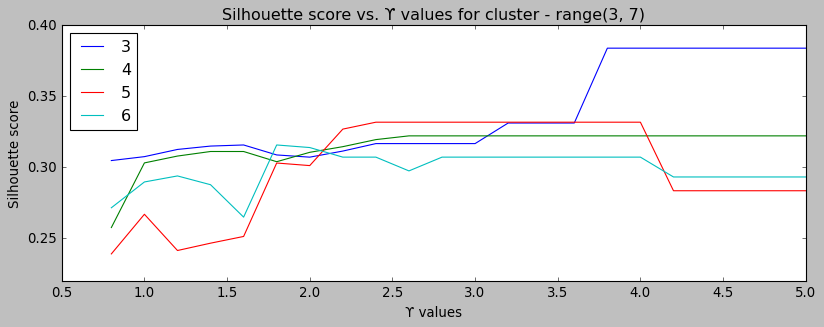

In [244]:
data_toPlot = griFeature_df

clust_range = range(3,7)
gamma_range = np.arange( 0.8, 5.2, 0.2 )

silScore_dictn =  {}    #  silhouette_score

plt.style.use( 'dark_background' ); 
plt.style.use('classic'); 

for e_clustNo in clust_range:
    silScore_dictn[str(e_clustNo)] = []
    for e_gamma in gamma_range:
        spectralClust_fit = sklearn.cluster.SpectralClustering( n_clusters= e_clustNo, eigen_solver= 'arpack', gamma= e_gamma, affinity= 'rbf', assign_labels= 'discretize',
                                                                random_state = 10, n_jobs= os.cpu_count()-1 )\
                                                    .fit( data_toPlot )
        
        silScore_dictn[ str(e_clustNo) ].append (  sklearn.metrics.silhouette_score( data_toPlot, labels= spectralClust_fit.labels_ )  )
        
silScore_df = pd.DataFrame.from_dict( silScore_dictn ).set_index( gamma_range )


## plots
fig, ax = plt.subplots( figsize= (12,4) )
plt.style.context( style= 'seaborn-darkgrid' )
plt.style.use( 'dark_background' )
plt.style.use('classic'); 


ax.plot( silScore_df.index, silScore_df )

ax.set( title= 'Silhouette score vs. ϒ values for cluster - '+ str(clust_range), xlabel= 'ϒ values', ylabel= 'Silhouette score' )
ax.legend( silScore_df.columns, loc= 'best' )
plt.show()

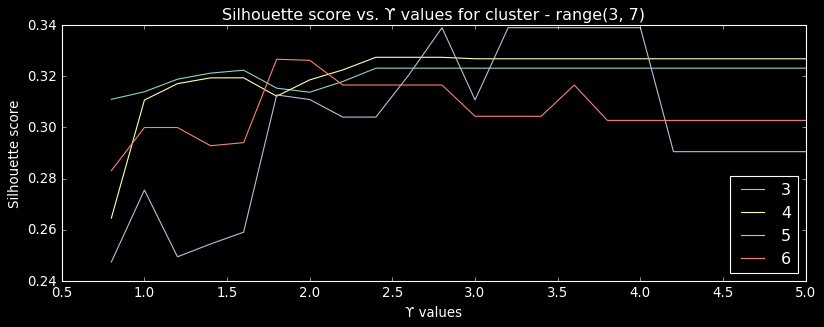

In [33]:
data_toPlot = pc_df.iloc[ :, :pcth ]

clust_range = range(3,7)
gamma_range = np.arange( 0.8, 5.2, 0.2 )

silScore_dictn =  {}    #  silhouette_score

for e_clustNo in clust_range:
    silScore_dictn[str(e_clustNo)] = []
    for e_gamma in gamma_range:
        spectralClust_fit = sklearn.cluster.SpectralClustering( n_clusters= e_clustNo, eigen_solver= 'arpack', gamma= e_gamma, affinity= 'rbf', assign_labels= 'discretize',
                                                                random_state = 10, n_jobs= os.cpu_count()-1 )\
                                                    .fit( data_toPlot )
        
        silScore_dictn[ str(e_clustNo) ].append (  sklearn.metrics.silhouette_score( data_toPlot, labels= spectralClust_fit.labels_ )  )
        
silScore_df = pd.DataFrame.from_dict( silScore_dictn ).set_index( gamma_range )

## plots
fig, ax = plt.subplots( figsize= (12,4) )

ax.plot( silScore_df.index, silScore_df )

ax.set( title= 'Silhouette score vs. ϒ values for cluster - '+ str(clust_range), xlabel= 'ϒ values', ylabel= 'Silhouette score' )
ax.legend( silScore_df.columns, loc= 'best' )
plt.show()

<br>

> ## Agglomerative clustering <br>

`Principal Component Analysis (PCA)` is done prior to `Agglomerative Clustering` and subsequently Principal Components are used as in input of `Agglomerative Clustering`. 

In [ ]:
# pca
pca_obj = sklearn.decomposition.PCA( random_state= 10 )
pc_df = pca_obj.fit_transform( griFeature_df )
# pc col nomenclature 
colNm_ls = [  ('pc_'+str(e_colm[0]+1)) for e_colm in enumerate( griFeature_df.columns )  ]
pc_df = pd.DataFrame( pc_df, columns= colNm_ls  );      pc_df.head(3)

In [83]:
# sklearn AgglomerativeClustering

aggCluster_obj = sklearn.cluster.AgglomerativeClustering( n_clusters= 4, affinity=  'cosine', linkage= 'complete'  )
aggCluster_obj.fit( X= pc_df )
yhat = aggCluster_obj.fit_predict( X= pc_df )

sklearn.metrics.silhouette_score( X= pc_df, labels= yhat ),   sklearn.metrics.calinski_harabasz_score( X= pc_df, labels= yhat )

(0.13647463798243392, 37.58973962639799)

In [6]:
# scipy fcluster for dendogram

dstMtrx = scipy.cluster.hierarchy.linkage( pc_df, method= 'ward' )

yhat = scipy.cluster.hierarchy.fcluster( Z= dstMtrx, t= 1.1, criterion= 'distance' )

sklearn.metrics.silhouette_score( X= pc_df, labels= yhat )
sklearn.metrics.calinski_harabasz_score( X= pc_df, labels= yhat )

41.67065004111589

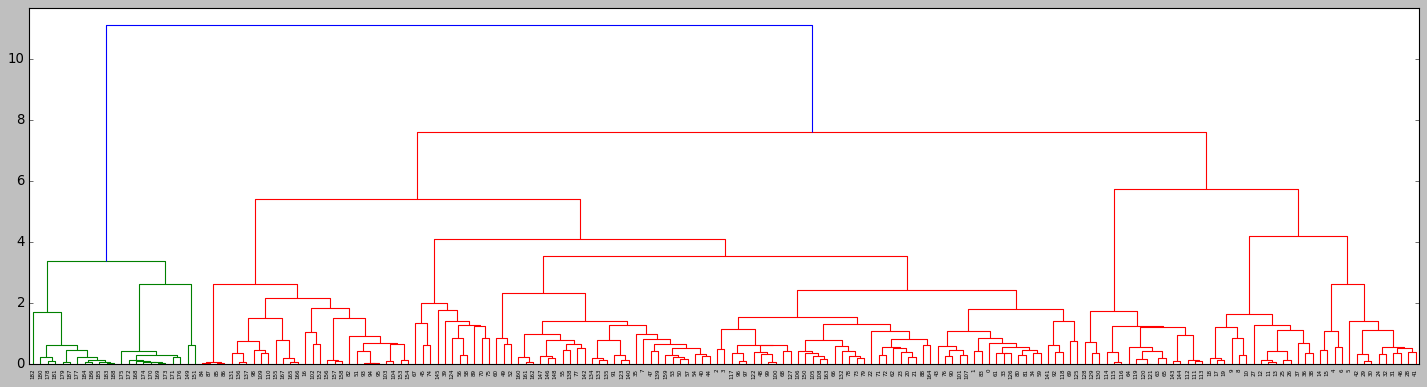

In [10]:
plt.style.use( 'classic' )

dstMtrx = scipy.cluster.hierarchy.linkage( pc_df, method= 'ward' )
fg,ax = plt.subplots( figsize= (18,5) )
dendogram_dictn = scipy.cluster.hierarchy.dendrogram( Z= dstMtrx, ax= ax ); plt.tight_layout()

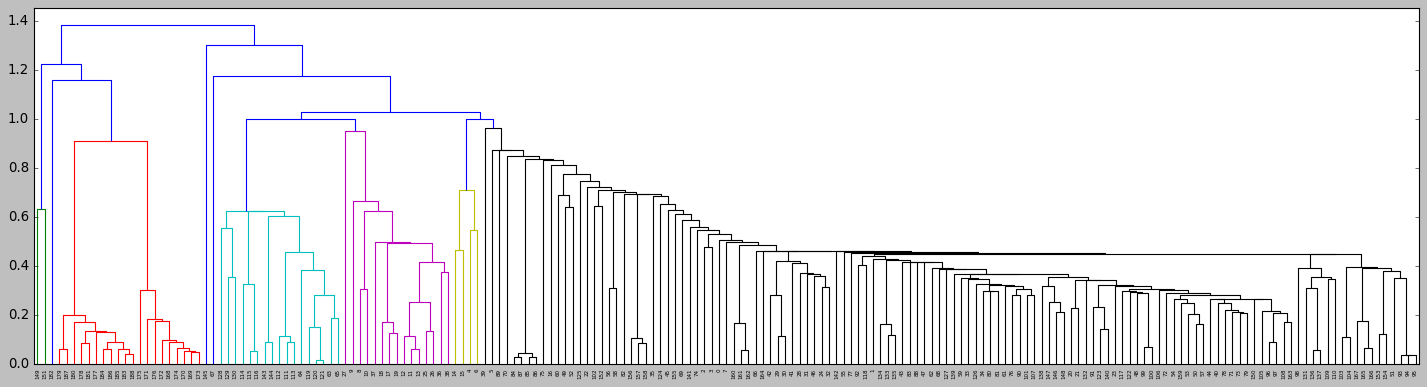

In [11]:
plt.style.use( 'classic' )

dstMtrx = scipy.cluster.hierarchy.linkage( pc_df )
fg,ax = plt.subplots( figsize= (18,5) )
aggCluster_obj = scipy.cluster.hierarchy.dendrogram( Z= dstMtrx, ax= ax ); plt.tight_layout()

#### hyperparam tuning for AgglomerativeClustering

In [104]:
##  grid search func for a model

def grdSrc_model( n_cluster, affinity_ward, affinity_other, linkage ):
    global xx
    
    xx_np = xx.to_numpy()
    
    if linkage == 'ward':  aggCluster_obj = sklearn.cluster.AgglomerativeClustering( n_clusters= n_cluster, affinity= affinity_ward, linkage= linkage )
    else:  aggCluster_obj = sklearn.cluster.AgglomerativeClustering( n_clusters= n_cluster, affinity= affinity_other, linkage= linkage )
        
    aggCluster_obj.fit( X= xx_np )
    yhat = aggCluster_obj.fit_predict( X= xx_np )     
    
    # removing -ve valye from yhat and corresponding xx
    yhat_posv = yhat[ yhat!= -1 ]
    xx_posv = xx_np[ yhat!= -1 ]
    
    # calc the clustering's metrics
    try: silScore = sklearn.metrics.silhouette_score( X= xx_np, labels= yhat )
    except: silScore = np.nan
    try: calScore = sklearn.metrics.calinski_harabasz_score( xx_np, yhat ) 
    except: calScore = np.nan
    try: dbcv = DBCV.DBCV( xx_posv, yhat_posv )
    except: dbcv = np.nan
    
    if linkage == 'ward':  affinity_other = affinity_ward
    else: affinity_ward = affinity_other
        
    return(  [   n_cluster, affinity_ward, affinity_other, linkage, silScore, calScore, dbcv ]  )

# -------------------------------------------------------------------------------------------------------------------------------------

## 2nd hparam tuning
# input feature
xx = pc_df             # <-- check the correct variable 

# hparams
n_cluster = np.linspace( 2,7,6, dtype= np.int8 )
affinity_ward = [ 'euclidean' ];          affinity_other = [ 'l1', 'l2', 'manhattan', 'cosine' ]
linkage = [ 'ward', 'complete', 'average', 'single' ]
num_hp = 5000                                                      # num of randomly choosen hparams

## create list of products of hparams
hparam_ls = [  n_cluster, affinity_ward, affinity_other, linkage  ]

# no edits below this -------------------------------------------------------------------------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
                                   
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]

# select num_hp hparams randomly if num_hp > no of hparam
if  num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [105]:
# run model with hparamset    
result_ls = [   grdSrc_model( n_cluster= e_hparam[0], affinity_ward= e_hparam[1], affinity_other= e_hparam[2], linkage= e_hparam[3] )\
                for e_hparam in hparam_rnd   ]

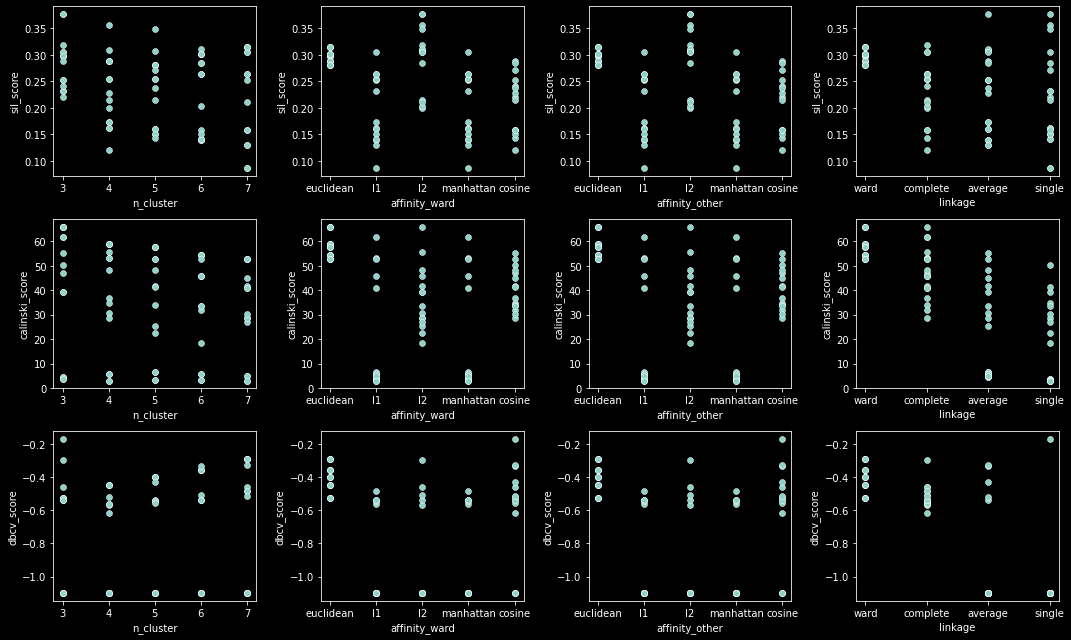

In [106]:
scores_colNm = [ 'sil_score','calinski_score','dbcv_score' ]

len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + scores_colNm )

# replace nan with integer
result_aNAN_df = result_df.replace( to_replace= np.nan, value= -1.1 )

condn = ( result_aNAN_df.n_cluster > 0 )
condn = result_aNAN_df.n_cluster.isin([3,4,5,6,7])                    

## plots
data_toPlot = result_aNAN_df.loc[ condn , : ];

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (15,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['calinski_score'], ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['dbcv_score'], ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout()
plt.show()

#### top 10 results after hyper parameter tuning

In [107]:
pd.options.display.max_rows = 12

In [108]:
result_topN = result_aNAN_df.sort_values( 'sil_score',ascending=False).groupby('n_cluster').head(2).sort_values( ['n_cluster','sil_score'], ascending= [True,False] )
result_topN

,n_cluster,affinity_ward,affinity_other,linkage,sil_score,calinski_score,dbcv_score
0,2,euclidean,euclidean,ward,0.418352,73.614560,-0.051279
4,2,euclidean,euclidean,ward,0.418352,73.614560,-0.051279
22,3,l2,l2,average,0.376703,39.188984,-1.100000
23,3,l2,l2,single,0.376703,39.188984,-1.100000
39,4,l2,l2,single,0.355698,28.754668,-1.100000
38,4,l2,l2,average,0.309963,30.883381,-1.100000
55,5,l2,l2,single,0.349372,22.312160,-1.100000
54,5,l2,l2,average,0.306386,25.344332,-1.100000
70,6,l2,l2,average,0.311809,33.367304,-1.100000
64,6,euclidean,euclidean,ward,0.302412,54.279069,-0.357885


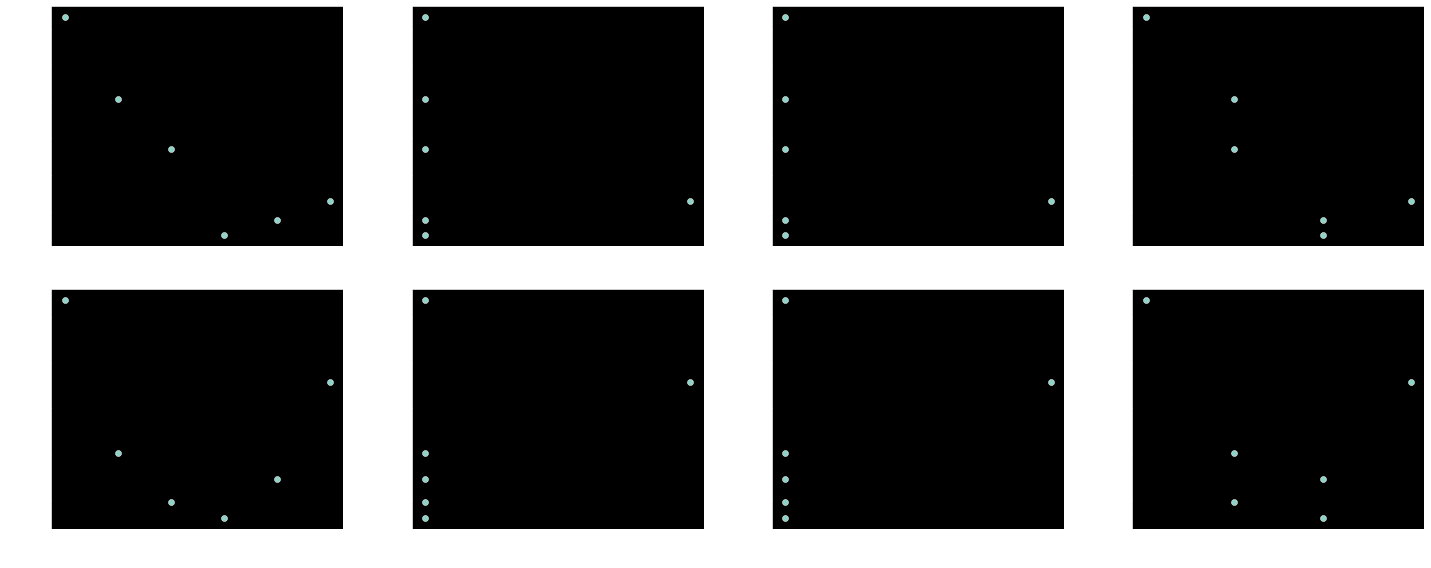

In [159]:
## plots
data_toPlot = result_topN          

fg,ax = plt.subplots( 2, data_toPlot.shape[1]-2 , figsize= (20,8) )
ax_flat = ax.flatten()
for idx, e_feature in enumerate( data_toPlot.columns[:-2] ):
    sns.scatterplot(  x= data_toPlot[e_feature], y= data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  x= data_toPlot[e_feature], y= data_toPlot['calinski_score'], ax= ax_flat[ idx+data_toPlot.shape[1]-2 ]  )
plt.tight_layout(); plt.show()

From hparam tuning, we can consider `affinity = 'l2'` & `linkage = 'average'`

In [161]:
pd.options.display.max_rows = 5

<br>

> ## Density-based spatial clustering of applications with noise - `DBSCAN` <br>

[Theory: DBSCAN ML TV](https://www.youtube.com/watch?v=6jl9KkmgDIw&ab_channel=MachineLearningTV) &emsp;  | &emsp; 
[Theory: DBSCAN Visualization](https://www.youtube.com/watch?v=_A9Tq6mGtLI&ab_channel=TheDataPost) &emsp;  | &emsp; 
[Theory: DBSCAN Scikit Implementation](https://www.youtube.com/watch?v=Q7iWANbkFxk&list=RDCMUC7Fs-Fdpe0I8GYg3lboEuXw&start_radio=1&t=862s&ab_channel=NormalizedNerd)



> #### Advantages of DBSCAN

    - Arbitrarily shaped clusters
    - Robust to outliers
    - Doesn't require specification of the number of clusters
    
<table><tr>    
<td> <h3><p style= 'text-align:left;'></p>DBSCAN Clustering mechanism</h3> <img src= 'images/DBSCAN.png' alt= 'Drawing' style= 'width:723px;height:426px;'> </td>
<td> <h3><p style= 'text-align:right;'></p>K-Means v Density-based clustering</h3> <img src= 'images/DBSCAN_compare.png' alt= 'Drawing' style= 'width:764px;height:426px;'> </td>
</tr></table>

> #### Hyperparameter tuning for DBSCAN requires optimum epsilon distance & min_samples values.

Both `Silhouette` and `Calinski-Harabasz` are based on the assumption of `Convex clusters` (for example, the dispersion is clearly a measure that assumes a
radial distribution of the samples around the centroid), so their expected values in a non-convex case are generally smaller. However, we want to maximize both scores (`Silhouette → 1` and `Calinski-Harabasz → ∞` ) and, at the same time, avoid a large number of clusters. The cluster range for our data based on previous methods would be 3-7.

In order to find out the best hparams, we plot # clusters, the # of noise points, the Silhouette score, and the Calinski-Harabasz score as functions of `ε` employing a `Euclidean Distance`.

#### Metrics for Measuring DBSCAN’s Performance:

`Silhouette Score`: The silhouette score is calculated utilizing the mean intra-cluster distance between points, AND the mean nearest-cluster distance. For instance, a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong `Silhouette score`. A `silhouette score` ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score. Silhouette scores of 0 suggest overlapping clusters.

`Inertia`: Inertia measures the internal cluster sum of squares (sum of squares is the sum of all residuals). Inertia is utilized to measure how related clusters are amongst themselves, the lower the inertia score the better. HOWEVER, it is important to note that inertia heavily relies on the assumption that the clusters are <b>`convex`</b> (of spherical shape). DBSCAN does not necessarily divide data into spherical clusters, therefore inertia is not a good metric to use for evaluating DBSCAN models. Inertia is more often used in other clustering methods, such as K-means clustering.

<b>`DBSCAN & HDBSCAN metrics - DBCV`:</b>

DBCV computes two values:

    - the density within a cluster
    - the density between clusters

High density within a cluster, and low density between clusters indicates good clustering assignments.

<br>

`Principal Component Analysis (PCA)` is done prior to DBSCAN and subsequently Principal Components are used as in input of `DBSCAN`. 

In [ ]:
pc_df.head(3)

In [35]:
'''We have consider 18 PCs as discussed above'''

'We will consider 18 PCs as discussed above'

In [83]:
##  grid search func for a model

def grdSrc_model( eps, min_samples ):
    global xx
    yhat = sklearn.cluster.DBSCAN( eps= eps, min_samples= min_samples, algorithm= 'brute', metric= 'euclidean', n_jobs= os.cpu_count(),   )\
                               .fit_predict( xx )
    n_cluster = len( set(yhat) ) - ( 1 if -1 in yhat else 0 )
    
    # removing -ve valye from yhat and corresponding xx
#     yhat_posv = yhat[ yhat!= -1 ]    ;       xx_posv = xx[ yhat!= -1 ]
    yhat_posv = yhat    ;       xx_posv = xx
    
    # calc the clustering's metrics
    try: silScore = sklearn.metrics.silhouette_score( X= xx, labels= yhat )
    except: silScore = np.nan
    try: calScore = sklearn.metrics.calinski_harabasz_score( xx, yhat ) 
    except: calScore = np.nan
    try: dbcv = DBCV.DBCV( xx_posv, yhat_posv  )
    except: dbcv = np.nan

    return(  [ eps, min_samples, n_cluster, silScore, calScore, dbcv ]  )

In [147]:
# 1st hparam tuning

# input feature
xx = pc_df.iloc[ :, :pcth ].to_numpy()             # <-- check the correct variable 

# hparams
eps = np.linspace( 0.1, 10, 199, dtype= np.float16 )
min_samples =  np.linspace( 2, xx.shape[0]//3, xx.shape[0]//3-3, dtype= np.int8 )

num_hp = 25000000                  # num of randomly choosen hparams

## create list of products of hparams

hparam_ls = [ eps, min_samples ]

# no edits below this ----------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
                                   
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]

# select num_hp hparams randomly

if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [86]:
# run model with hparamset

import warnings; warnings.filterwarnings( action= 'ignore' )

result_ls = [   grdSrc_model( eps= e_hparam[0], min_samples= e_hparam[1] )  for e_hparam in hparam_rnd   ]

In [87]:
scores_colNm = [ 'sil_score','calinski_score','dbcv_score' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + ['n_cluster'] + scores_colNm )

# replace nan with number
result_aNAN_df = result_df.replace( to_replace= np.nan, value= -1.1 )

In [90]:
# save the hparam result to csv

result_df.to_csv( location + 'DBSCAN_original_result_12162021.csv', index= False, header= True )
result_aNAN_df.to_csv( location + 'DBSCAN_noNAN_result_12162021.csv', index= False, header= True )

In [ ]:
result_posv_df = result_aNAN_df[  ( result_aNAN_df['dbcv_score']>0 ) & ( result_aNAN_df['n_cluster'].isin([3,4,5,6,7]) ) ]
result_DBSCAN_topN = result_posv_df.sort_values('dbcv_score',ascending=False).groupby('n_cluster').head(1).sort_values( ['n_cluster','dbcv_score'], ascending= [True,False] )


In [161]:
pd.options.display.max_rows = 10

# !! alert

dbscan_result = pd.read_csv( location + 'DBSCAN_original_result_12162021.csv' )

result_posv_df = dbscan_result[  ( dbscan_result['dbcv_score']>0 ) & ( dbscan_result['n_cluster'].isin([3,4,5,6,7]) ) ]
result_DBSCAN_topN = result_posv_df.sort_values( 'dbcv_score', ascending= False )\
                                   .groupby('n_cluster').head(2)\
                                   .sort_values( ['n_cluster','dbcv_score'], ascending= [True,False] )

result_DBSCAN_topN

,eps,min_samples,n_cluster,sil_score,calinski_score,dbcv_score
1260,1.15,2,3,0.372872,29.487010,0.120519
1200,1.10,2,3,0.372872,29.487010,0.120519
968,0.90,10,4,0.261522,37.038272,0.054004
909,0.85,11,4,0.258670,35.480027,0.037472
905,0.85,7,5,0.309800,38.603769,0.086023
907,0.85,9,5,0.309800,38.603769,0.086023
901,0.85,3,6,0.319259,35.844956,0.091813
902,0.85,4,6,0.320914,36.287650,0.075954
900,0.85,2,7,0.327984,33.190817,0.114060
960,0.90,2,7,0.326945,33.748196,0.090324


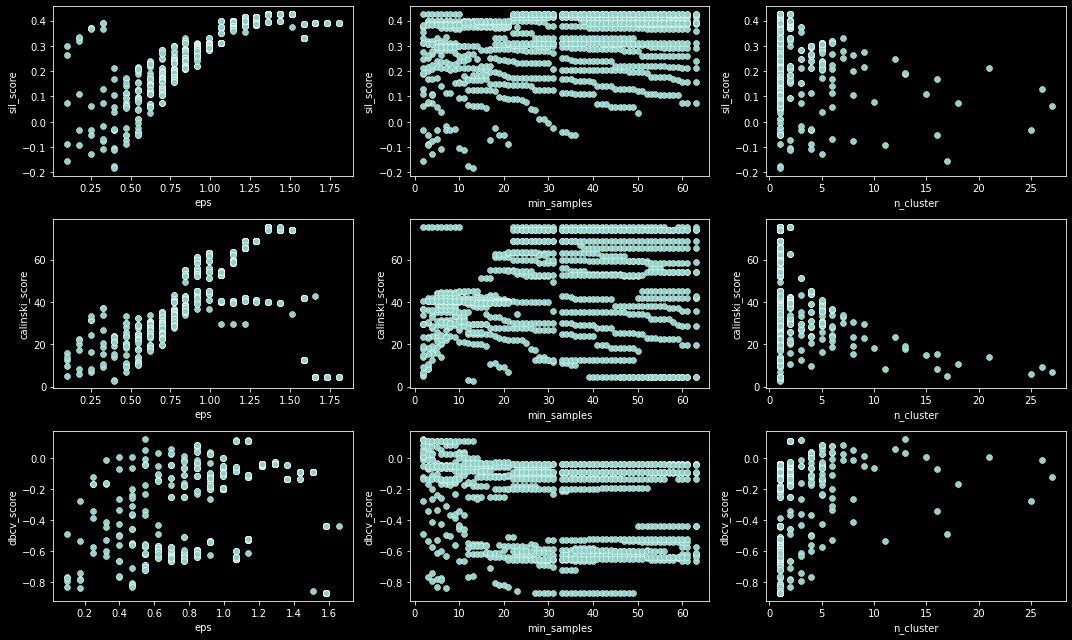

In [159]:
 import warnings; warnings.filterwarnings( action= 'ignore' )

condn = ( result_aNAN_df.n_cluster > 0 )
condn =  (  result_aNAN_df.dbcv_score > 0  ) & (  result_aNAN_df.n_cluster.isin( [3,4,5,6,7] )  )

## plots
data_toPlot = result_aNAN_df.loc[ condn , : ]

data_toPlot = result_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (15,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['calinski_score'],  ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['dbcv_score'],      ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout();  plt.show()

In [178]:
pd.options.display.max_rows = 10
result_aNAN_df[ result_aNAN_df['n_cluster'] == 4 ].sort_values( by= 'dbcv_score', ascending= False ).head(10)

,eps,min_samples,n_cluster,sil_score,calinski_score,dbcv_score
608,0.843750,10,4,0.258670,35.480027,0.037472
609,0.843750,11,4,0.258670,35.480027,0.037472
666,0.917969,8,4,0.298269,44.945946,0.024274
664,0.917969,6,4,0.298269,44.945946,0.024274
669,0.917969,11,4,0.298269,44.945946,0.024274
668,0.917969,10,4,0.298269,44.945946,0.024274
667,0.917969,9,4,0.298269,44.945946,0.024274
665,0.917969,7,4,0.298269,44.945946,0.024274
731,0.992188,13,4,0.300768,44.991094,0.002322
730,0.992188,12,4,0.300768,44.991094,0.002322


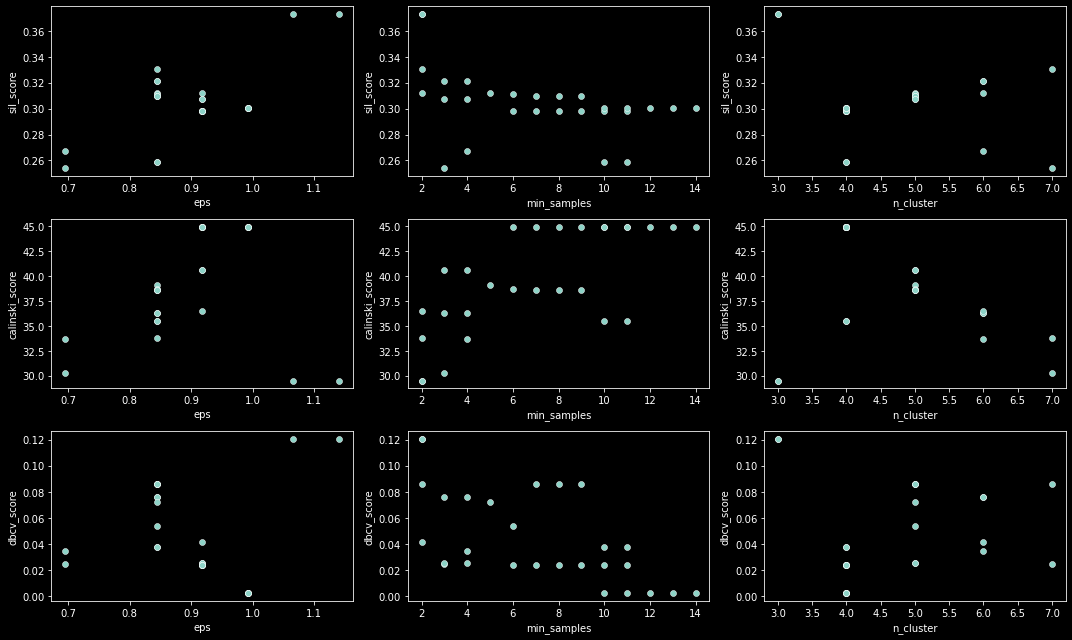

In [161]:
 import warnings; warnings.filterwarnings( action= 'ignore' )

condn = ( result_aNAN_df.n_cluster > 0 )
condn =  (  result_aNAN_df.dbcv_score > 0  ) & (  result_aNAN_df.n_cluster.isin( [3,4,5,6,7] )  )

## plots
data_toPlot = result_aNAN_df.loc[ condn , : ]

# data_toPlot = result_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (15,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['calinski_score'],  ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['dbcv_score'],      ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout();  plt.show()

#### 2nd hparam tuning

`eps ϵ ( 0, 0.5 ]    &    min_sample ϵ [ 3, 9 ]`

In [31]:
# 2nd hparam tuning

# input feature
xx = pc_df.iloc[ :, :pcth ].to_numpy()             # <-- check the correct variable 
# hparams
eps = np.linspace( 0.1, 3, 40, dtype= np.float16 )
min_samples =  np.linspace( 3,9,7, dtype= np.int8 )
p = [2]
num_hp = 2500                  # num of randomly choosen hparams
## create list of products of hparams
hparam_ls = [ eps, min_samples, p ]

# no edits below this ----------------------------------------------------------------------
hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select num_hp hparams randomly
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [32]:
# run model with hparamset    
result_ls = [   grdSrc_model( eps= e_hparam[0], min_samples= e_hparam[1] )  for e_hparam in hparam_rnd   ]   # <-- make sure the argument is correct hparam

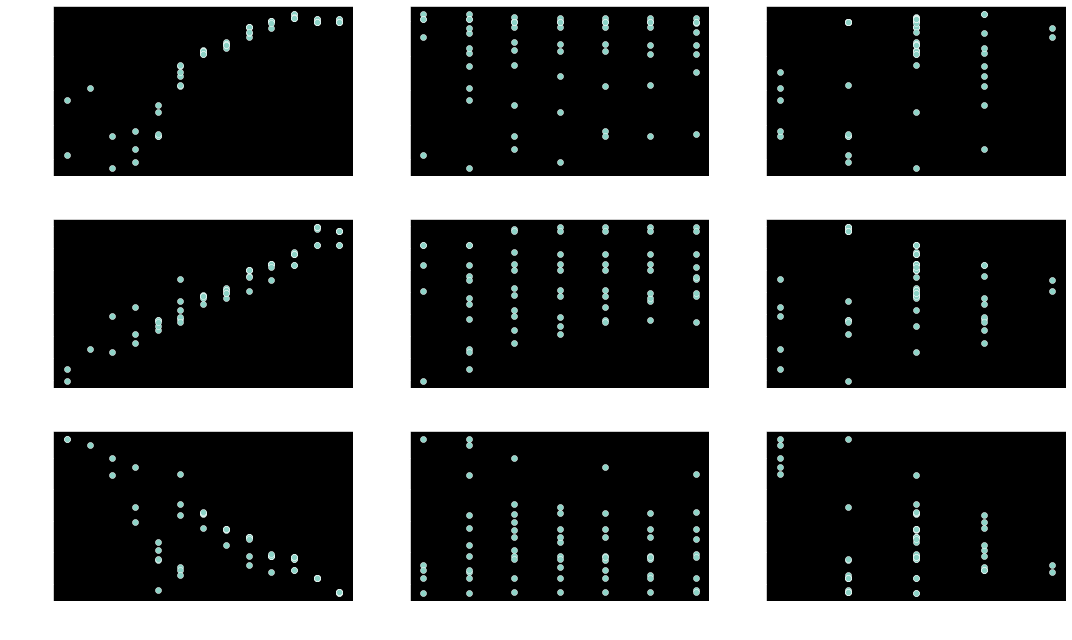

In [34]:
scores_colNm = [ 'sil_score','calinski_score','dbcv_score' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + ['n_cluster'] + scores_colNm )

# replace nan with integer
result_aNAN_df = result_df.replace( to_replace= np.nan, value= -1.1 )

condn = ( result_aNAN_df.n_cluster > 0 )
condn =  result_aNAN_df.n_cluster.isin( [3,4,5,6,7] )                   

## plots
data_toPlot = result_aNAN_df.loc[ condn , : ];             # data_toPlot = result_aNAN_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (15,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['calinski_score'], ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['dbcv_score'], ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [40]:
pd.options.display.max_rows = 20

In [56]:
pd.options.display.max_rows = 20
result_posv_df = result_aNAN_df[  ( result_aNAN_df['dbcv_score']>0 ) & ( result_aNAN_df['n_cluster'].isin([3,4,5,6,7]) ) ]
result_DBSCAN_topN = result_posv_df.sort_values('dbcv_score',ascending=False).groupby('n_cluster').head(1).sort_values( ['n_cluster','dbcv_score'], ascending= [True,False] )

result_DBSCAN_topN

,eps,min_samples,n_cluster,sil_score,calinski_score,dbcv_score
1,0.099976,4,3,0.072903,12.634048,0.918645
0,0.099976,3,4,-0.088143,9.927216,0.921341
15,0.248657,4,5,-0.126472,16.545605,0.692116
36,0.471680,4,6,0.169022,24.008867,0.437043
56,0.694824,3,7,0.253865,30.250480,0.123268


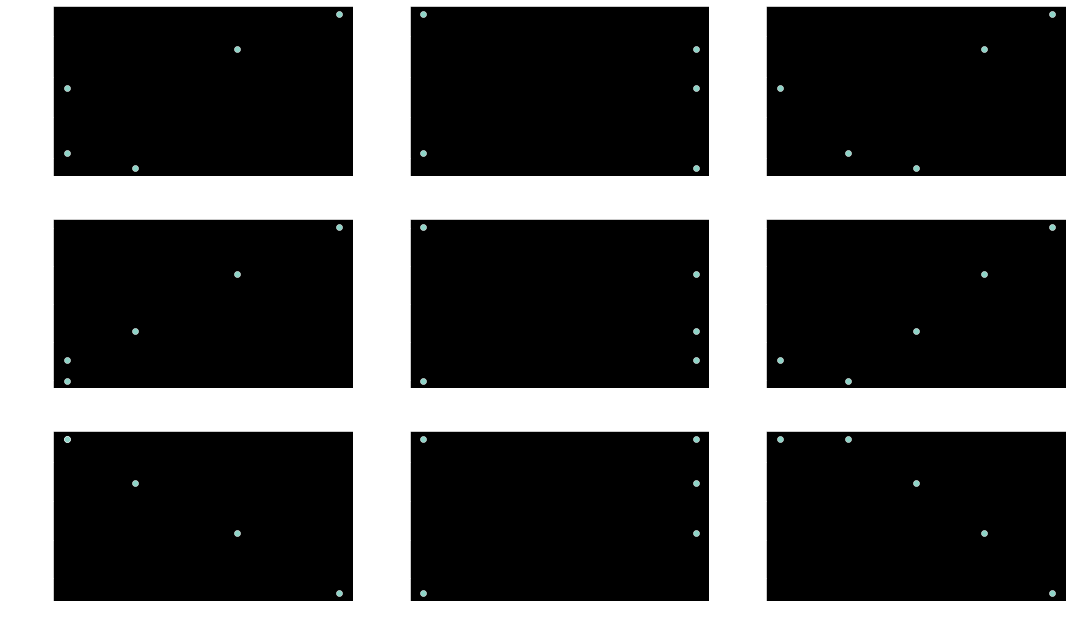

In [57]:
condn =  result_DBSCAN_topN.n_cluster.isin( [3,4,5,6,7] )                   

## plots
data_toPlot = result_DBSCAN_topN.loc[ condn , : ];             # data_toPlot = result_aNAN_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (15,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['sil_score'], ax= ax_flat[idx]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['calinski_score'], ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data_toPlot[e_feature], data_toPlot['dbcv_score'], ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [58]:
pd.options.display.max_rows = 6
result_DBSCAN_topN

,eps,min_samples,n_cluster,sil_score,calinski_score,dbcv_score
1,0.099976,4,3,0.072903,12.634048,0.918645
0,0.099976,3,4,-0.088143,9.927216,0.921341
15,0.248657,4,5,-0.126472,16.545605,0.692116
36,0.471680,4,6,0.169022,24.008867,0.437043
56,0.694824,3,7,0.253865,30.250480,0.123268


#### Noise in DBSCAN

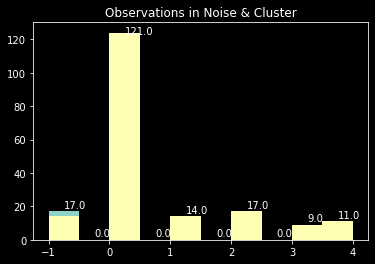

In [111]:
dbscan_fit1 = sklearn.cluster.DBSCAN( eps= 0.840332, min_samples= 6 ).fit( xx )
_, _, xyVal = plt.hist(  np.sort( dbscan_fit1.labels_ )  ); plt.title( 'Observations in Noise & Cluster')

for e_lbl in xyVal:
    x = ( e_lbl._x0 + e_lbl._x1 )/2 
    plt.text( x, e_lbl._y1+2, e_lbl._y1 )

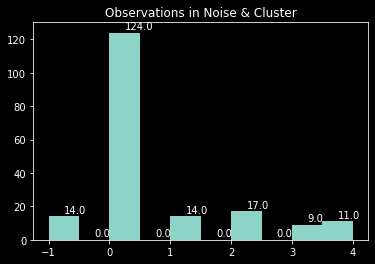

In [112]:
dbscan_fit2 = sklearn.cluster.DBSCAN( eps= 0.90, min_samples= 6 ).fit( xx )
_, _, xyVal2 = plt.hist(  np.sort( dbscan_fit2.labels_ )  ); plt.title( 'Observations in Noise & Cluster' )

for e_lbl in xyVal2:
    x = ( e_lbl._x0 + e_lbl._x1 )/2 
    plt.text( x, e_lbl._y1+2, e_lbl._y1 )

In [213]:
# dbscan hparam

eps_ls= [ 0.099976, 0.099976, 0.248657, 0.471680, 0.694824 ]
min_samples_ls =  [ 4, 3, 4, 4, 3 ]

In [122]:
# last hparam tuning

# input feature
xx = pc_df.iloc[ :, :pcth ].to_numpy()             # <-- check the correct variable 
# hparams
eps = np.linspace( 0.6, 0.9, 20, dtype= np.float16 )
min_samples =  np.linspace( 30,60, dtype= np.int8 )
num_hp = 2500                  # num of randomly choosen hparams
## create list of products of hparams
hparam_ls = [ eps, min_samples ]

# no edits below this ----------------------------------------------------------------------
hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select num_hp hparams randomly
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [125]:
# run model with hparamset    
result_ls = [   grdSrc_model( eps= e_hparam[0], min_samples= e_hparam[1] )  for e_hparam in hparam_rnd   ]   # <-- make sure the argument is correct hparam

<br>

> ## Hierarchical Density-based spatial clustering of applications with noise - `HDBSCAN` <br>

HDBSCAN yields clusters such that each cluster is a - 
    connected components of a level set of the probability density func of the underlying (or even unknown) distribution from which the data sample are drawn.

[Theory: Video - HDBSCAN PyData](https://www.youtube.com/watch?v=dGsxd67IFiU&ab_channel=PyData) &emsp;  | &emsp; 
[Theory: Good Article - Understanding HDBSCAN and Density-Based Clustering](https://pberba.github.io/stats/2020/01/17/hdbscan/) &emsp;  | &emsp;
[Theory: Good Article - KDnuggetsUnderstanding Density-based Clustering](https://www.kdnuggets.com/2020/02/understanding-density-based-clustering.html)



> <b>Salient features</b>
    
    - Density-based clustering is robust to -->  varying-shaped clustering
    - Hierarchical clustering account for -->  "resolution" problem

> <b>Steps in `HDBSCAN`:</b>

    - 1. Locally approximate the probability density
    - 2. Set the level for clustering based on the probability density based on the intuition that : 
                        the connected components of level sets form a tree

<br>
<td> <h3><p style= 'text-align:center;'>HDBSCAN Algo</p></h3> <img src= 'images/HDBSCAN_algo.png' alt= 'Drawing' style= 'width:1490;height:800px;'> </td>

<br>
<td> <h3><p style= 'text-align:center;'>Clustering comparison</p></h3> <img src= 'images/clustering_algo_comparison.png' alt= 'Drawing' style= 'width:1270;height:580px;'> </td>

<br>

### Hyperparameter Tuning

> `min_samples` - the simplest intuition for what `min_samples` does is provide a measure of how conservative one wants the clustering to be. The larger the value of `min_samples`, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.<p>
`min_cluster_size` - it is the maximum size of a 'bump' before it is considered a peak. Increasing the value of `min_cluster_size`, in a way, smoothens the estimated PDF so that the true peaks of the distributions become prominent.<br>
Since we have access to the true PDF of X, we know a good value of `min_samples` that will anyway results in a smooth estimated PDF. If the `min_samples` estimates are resonable, then the `min_cluster_size` is not as important.
    
    
#### HDBSCAN’s implementation guidelines :

    - Compute the core distances per points
    - Use the mutual_reachability(a, b) as a distance metric for each a, b
    - Construct a minimum spanning tree
    - Prune the tree
    - Choose the clusters using “excess of mass”

    
<table><tr>    
<td> <h3><p style= 'text-align:center;'>Hyperparam Tuning</p></h3> <img src= 'images/HDBSCAN_hparamTune.png' alt= 'Drawing' style= 'width:1328px;height:701px;'> </td>
</tr></table>

In [15]:
# !pip install hdbscan --no-cache-dir --no-binary :all:
# !pip install package --no-cache-dir --no-binnary :all:
# !pip install --upgrade setuptools

In [27]:
# !pip install Amazon-DenseClus --user
# !pip install umap-learn
# !pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=4e7fef4856c409aa18d3881268c41f9b67d71075ba2c8b1668d8df4509c1465c
  Stored in directory: c:\users\madhur\appdata\local\pip\cache\wheels\d4\13\91\2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [15]:
griFeature_df

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River
0,0.041534,0.048828,0.007725,0.060394,0.306396,0.585449,0.058258,0.735352,0.371094,0.130005,0.546875,0.652832,0.325928,0.036621,0.053558,0.385986,0.582031,0.392090,0.054230,0.087891,0.103394,0.014709,0.032867,0.019989,0.507324,0.164429,0.034485,0.115051,0.111328,0,1
1,0.225830,0.318359,0.126099,0.086365,0.130249,0.525879,0.057098,0.738281,0.558594,0.242065,0.439697,0.610352,0.313721,0.048981,0.046600,0.016510,0.830078,0.138794,0.005131,0.022781,0.268066,0.016953,0.024872,0.000740,0.628906,0.050598,0.002840,0.025925,0.249023,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.003357,0.191650,0.004829,0.146851,0.038849,0.097595,0.077332,0.303711,0.671875,0.412842,0.500000,0.826172,0.615723,0.497803,0.011238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.762695,0.027252,0.204590,0.000000,0.000000,0.000000,0.000000,0.005299,1,0
188,0.000341,0.175415,0.001931,0.153931,0.026810,0.020813,0.043549,0.505371,0.708496,0.403076,0.517090,0.847168,0.380615,0.497803,0.011238,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.762695,0.027252,0.204590,0.000000,0.000000,0.000000,0.000000,0.005299,1,0


In [11]:
import denseclus
from denseclus import DenseClus
import logging
logging.captureWarnings( capture= True )

In [193]:
# data prep
griFeature_df.waterbody_type_MSSound = griFeature_df.waterbody_type_MSSound.astype( 'category' )
griFeature_df.waterbody_type_River = griFeature_df.waterbody_type_River.astype( 'category' )

In [194]:
denseCluster_obj = DenseClus( random_state= 10, umap_combine_method= 'intersection_union_mapper',
                              n_neighbors= 100, min_cluster_size= 10 )

print( denseCluster_obj )

denseCluster_obj.fit( griFeature_df )

{'random_state': 10, 'n_neighbors': 100, 'min_samples': 15, 'min_cluster_size': 10, 'n_components': None, 'cluster_selection_method': 'eom', 'umap_combine_method': 'intersection_union_mapper', 'verbose': False}


#### Under the hood
among other steps, DenseClus uses HDBSCAN to cluster the data.

Let's look at the how the data got classified.

In [195]:
embd_np = denseCluster_obj.mapper_.embedding_
yhat = denseCluster_obj.score()

posv_mask = (yhat >= 0)

cluster_member_df =  pd.DataFrame( yhat )[0].value_counts()
cluster_member_df

 2    101
 1     27
-1     22
 0     22
 3     17
Name: 0, dtype: int64

In addition, to simply looking at their spread, another way to evaluate clusters it to visualize them.

#### Clusters distribution

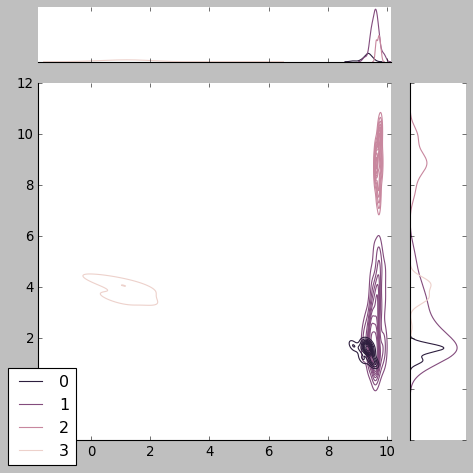

In [125]:
plt.style.use( 'classic' )

fctgrd1 = sns.jointplot( x= embd_np[ posv_mask,0 ], y= embd_np[ posv_mask,1 ], hue= yhat[posv_mask], kind= 'kde', legend = False )
fctgrd1.fig.legend( [0,1,2,3], loc= 'lower left' )
plt.tight_layout()

We can see we have 4 overlapping islands formed within this slice of the data. Clusters have formed around these densities which is exactly the behavior we expect DenseClus to do.

We can further confirm the outcome by plotting the tree along which the densities were split.

This is a graphical view of the counts we saw with more information.

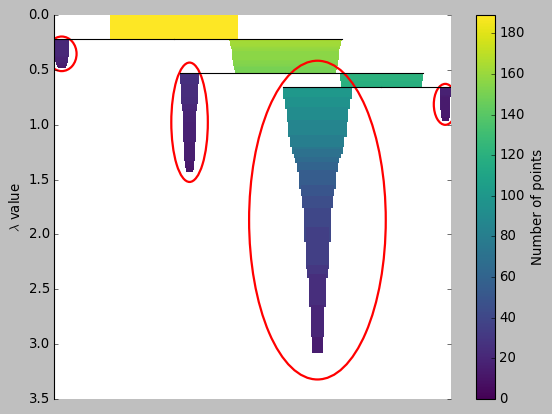

In [124]:
tree_plot = denseCluster_obj.hdbscan_.condensed_tree_.plot( select_clusters= True )

#### Clustered data to Noise ratio &  DBCV score

In [198]:
cdata_noise_ratio = np.sum( posv_mask )/embd_np.shape[0]

print( f'Clustered data to Noise ratio a.k.a Coverage --> {round(cdata_noise_ratio,2)}')

DBCV_score = denseCluster_obj.hdbscan_.relative_validity_
print( f'DBCV score --> {round(DBCV_score,2)}')

Clustered data to Noise ratio a.k.a Coverage --> 0.88
DBCV score --> 0.19


### GrdSrc

https://towardsdatascience.com/tuning-with-hdbscan-149865ac2970

In [12]:
##  grid search func for a model

def grdSrc_model(  min_cluster_size, min_samples, alpha, cluster_selection_epsilon, cluster_selection_method  ):
    global xx
    hdbscan_obj = hdbscan.HDBSCAN(  min_cluster_size= min_cluster_size, min_samples= min_samples, alpha= alpha,
                                    cluster_selection_epsilon= cluster_selection_epsilon, cluster_selection_method= cluster_selection_method,
                                    core_dist_n_jobs = -1 )
    yhat = hdbscan_obj.fit_predict( xx )
    
    n_cluster = len( set(yhat) ) - ( 1 if -1 in yhat else 0 )
    
    yhat_posv = yhat[ yhat!= -1 ]    ;       xx_posv = xx[ yhat!= -1 ]
    
    # calc the clustering's metrics
    try: silScore = sklearn.metrics.silhouette_score( X= xx, labels= yhat )
    except: silScore = np.nan
    try: calScore = sklearn.metrics.calinski_harabasz_score( xx, yhat ) 
    except: calScore = np.nan
    try: hdbscan_score = hdbscan.validity_index( xx, yhat )
    except: hdbscan_score = np.nan
    try: hdbscan_posv_score = hdbscan.validity_index( xx_posv, yhat_posv )
    except: hdbscan_posv_score = np.nan    
        
    return(  [  min_cluster_size, min_samples, alpha, cluster_selection_epsilon, cluster_selection_method,
                n_cluster, silScore, calScore, hdbscan_score, hdbscan_posv_score ]  )

In [58]:
## 1st hparam tuning
# input feature
xx = pc_df.iloc[ :, :pcth ].to_numpy()             # <-- check the correct variable 

# hparams
min_cluster_size =  np.linspace( 5, 130, 30, dtype= np.int16 )
min_samples =  np.linspace( 3, 150, 40, dtype= np.int16 )
alpha = np.linspace( 0.01,0.9,25, dtype= np.float16 )
cluster_selection_epsilon = np.linspace( 0.001,5,50, dtype= np.float16 )
cluster_selection_method = [ 'eom', 'leaf' ]  

num_hp = 1000000           # num of randomly choosen hparams

In [14]:
## create list of products of hparams

hparam_ls = [ min_cluster_size, min_samples, alpha, cluster_selection_epsilon, cluster_selection_method ]   # <--  make sure the list contains all the hparams in correct order

# no edits below this -------------------------------------------------------------------------------------------------------------------------------------

hparam_len = 1
for e_hparam in hparam_ls:  hparam_len *= len(e_hparam)
## create list of products of hparams
hparam_Product_ls = [  list(e_product) for e_product in itertools.product( *hparam_ls )  ]
# select num_hp hparams randomly if num_hp > no of hparam
if num_hp >= hparam_len:   hparam_rnd = hparam_Product_ls
else:   hparam_rnd = random.sample( hparam_Product_ls, k= num_hp )

In [16]:
# run model with hparam set    

result_ls = []
len_hparam_rnd = len( hparam_rnd )
time_start = time.time()

for idx, e_hparam in enumerate(  hparam_rnd, start= 1 ):
    result_ls.append(  
                            grdSrc_model( min_cluster_size= int(e_hparam[0]), min_samples= int(e_hparam[1]), alpha= float(e_hparam[2]),
                                          cluster_selection_epsilon = float(e_hparam[3]), cluster_selection_method= str(e_hparam[4])  )
                    )
    
    if ( idx / len_hparam_rnd*100 )%10 == 0:
        time_delta_hrs = round(  ( time.time() - time_start )/3600, 2  )
        percent_complete = round( idx/len_hparam_rnd*100, 0 )
        print( f'\n ----------- {percent_complete} % complete  ----------   Time taken: {time_delta_hrs} hours    ----------\
        Remaining time: {round(time_delta_hrs*(100-percent_complete)/percent_complete,2)} hours' )
        
print( f'\n\nTotal time taken --------->  {(time.time()-time_start)/3600} hours' )


 ----------- 10.0 % complete  ----------   Time taken: 0.16 hours    ----------        Remaining time: 1.44 hours

 ----------- 20.0 % complete  ----------   Time taken: 0.31 hours    ----------        Remaining time: 1.24 hours

 ----------- 30.0 % complete  ----------   Time taken: 0.47 hours    ----------        Remaining time: 1.1 hours

 ----------- 40.0 % complete  ----------   Time taken: 0.62 hours    ----------        Remaining time: 0.93 hours

 ----------- 50.0 % complete  ----------   Time taken: 0.78 hours    ----------        Remaining time: 0.78 hours

 ----------- 60.0 % complete  ----------   Time taken: 0.94 hours    ----------        Remaining time: 0.63 hours

 ----------- 70.0 % complete  ----------   Time taken: 1.09 hours    ----------        Remaining time: 0.47 hours

 ----------- 80.0 % complete  ----------   Time taken: 1.25 hours    ----------        Remaining time: 0.31 hours

 ----------- 90.0 % complete  ----------   Time taken: 1.4 hours    ----------  

In [17]:
scores_colNm = [ 'sil_score','calinski_score','hdbscan_score', 'hdbscan_posv_score' ]
len_score = len( scores_colNm )

result_df = pd.DataFrame( result_ls, columns= inspect.getfullargspec(grdSrc_model).args + ['n_cluster'] + scores_colNm )

In [19]:
pd.DataFrame.to_csv( result_df, location+'hdbscan_grdSrc1-12212021.csv' )

In [305]:
scores_colNm = [ 'sil_score','calinski_score','hdbscan_score', 'hdbscan_posv_score' ];   len_score = len( scores_colNm )

result_df = pd.read_csv( location+'hdbscan_grdSrc1-12212021.csv', index_col= [0]  )
result_Cluster_df = result_df.loc[ result_df['n_cluster'].isin( [3,4,5,6,7] ), :  ]

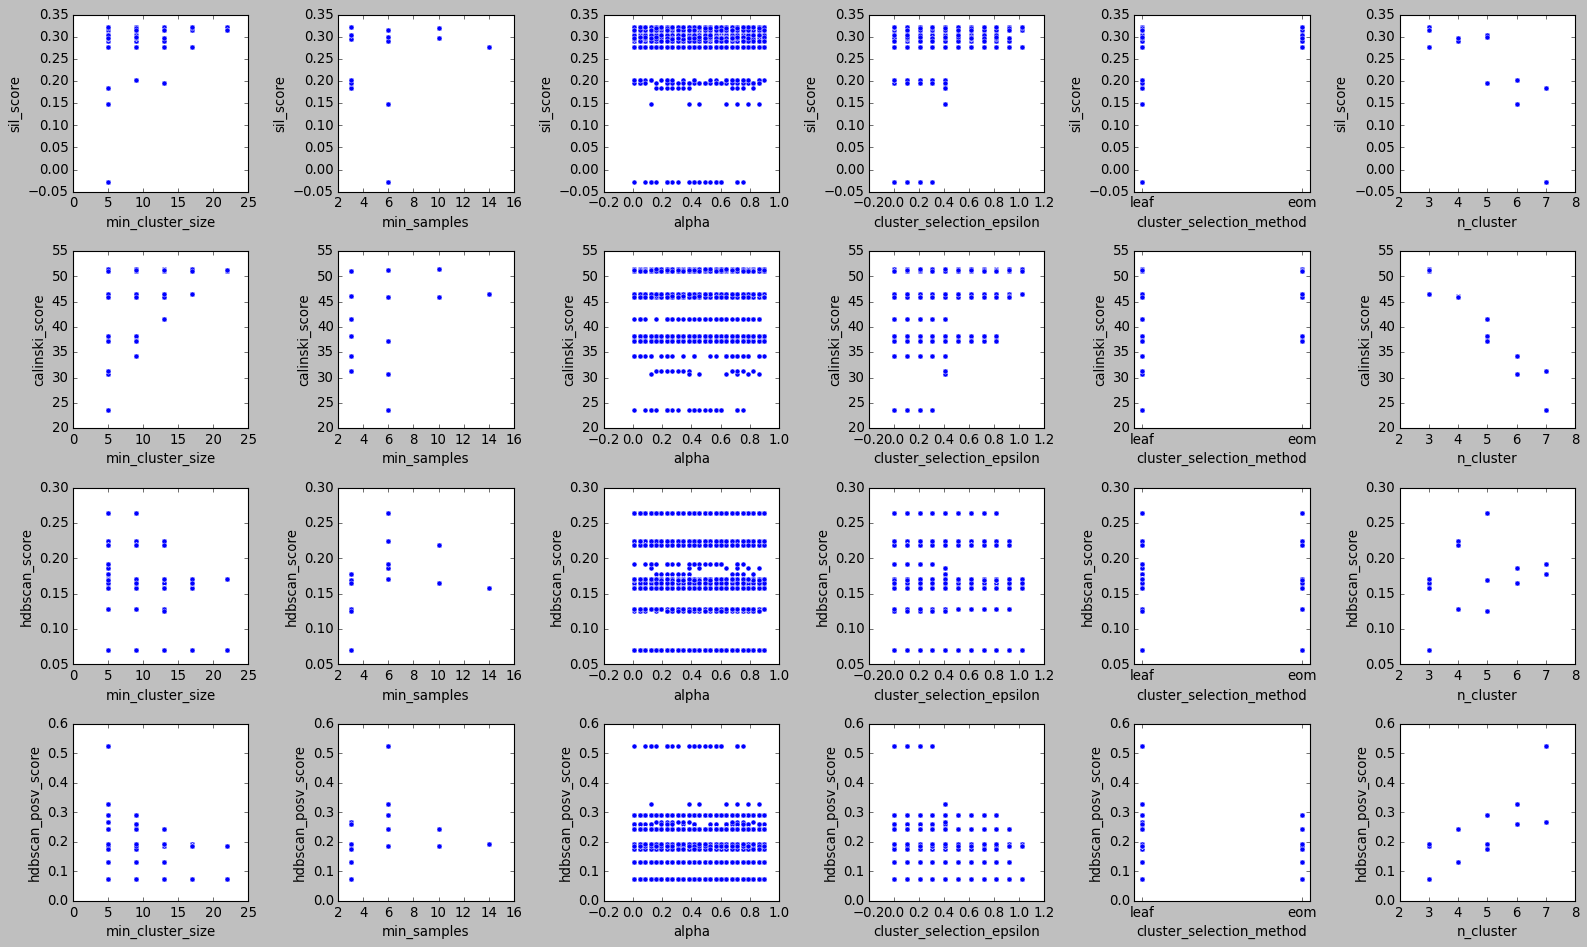

In [306]:
## plots
data_toPlot = result_Cluster_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (20,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'sil_score',           ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'calinski_score',      ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_score',       ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_posv_score',  ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [312]:
pd.options.display.max_rows = 30

result_topN = result_Cluster_df.sort_values('hdbscan_score',ascending=False).groupby('n_cluster').head(2).sort_values( ['n_cluster','hdbscan_score'], ascending= [True,False] )
result_topN

,min_cluster_size,min_samples,alpha,cluster_selection_epsilon,cluster_selection_method,n_cluster,sil_score,calinski_score,hdbscan_score,hdbscan_posv_score
104389,22,6,0.640625,0.511230,eom,3,0.315713,51.347003,0.170866,0.186669
413693,22,6,0.825684,0.103027,leaf,3,0.315713,51.347003,0.170866,0.186669
380127,13,6,0.751465,0.613281,eom,4,0.291386,45.840554,0.223851,0.244554
266041,5,6,0.232544,0.918945,leaf,4,0.291386,45.840554,0.223851,0.244554
400277,5,6,0.566406,0.409180,eom,5,0.299592,37.211704,0.264517,0.292361
960870,5,6,0.899902,0.613281,leaf,5,0.299592,37.211704,0.264517,0.292361
483639,5,6,0.380859,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
371562,5,6,0.862793,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
638513,5,6,0.529297,0.103027,leaf,7,-0.027603,23.558405,0.191998,0.525907
449680,5,6,0.417969,0.103027,leaf,7,-0.027603,23.558405,0.191998,0.525907


In [323]:
result_Cluster_df[ result_Cluster_df.n_cluster == 6 ].sort_values( 'hdbscan_score', ascending= False ).head()

,min_cluster_size,min_samples,alpha,cluster_selection_epsilon,cluster_selection_method,n_cluster,sil_score,calinski_score,hdbscan_score,hdbscan_posv_score
28030,5,6,0.714355,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
483639,5,6,0.380859,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
377781,5,6,0.640625,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
143920,5,6,0.455078,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
872961,5,6,0.788574,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
371562,5,6,0.862793,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
208664,5,6,0.121277,0.409180,leaf,6,0.148295,30.735492,0.186842,0.330029
685374,9,3,0.121277,0.205078,leaf,6,0.201966,34.335111,0.165699,0.260975
482521,9,3,0.640625,0.307129,leaf,6,0.201966,34.335111,0.165699,0.260975
567081,9,3,0.121277,0.001000,leaf,6,0.201966,34.335111,0.165699,0.260975


In [74]:
# only for cluster number = 5

condn = ( result_Cluster_df.n_cluster == 5 ) 

result_5Cluster_df = result_Cluster_df.loc[ condn, : ].sort_values( 'hdbscan_score', ascending= False )
result_5Cluster_df.head(10)

,min_cluster_size,min_samples,alpha,cluster_selection_epsilon,cluster_selection_method,n_cluster,sil_score,calinski_score,hdbscan_score,hdbscan_posv_score
2981,9,6,0.862793,0.613281,leaf,5,0.299592,37.211704,0.264517,0.292361
585573,5,6,0.306641,0.103027,eom,5,0.299592,37.211704,0.264517,0.292361
584208,9,6,0.380859,0.511230,leaf,5,0.299592,37.211704,0.264517,0.292361
577805,9,6,0.084167,0.307129,eom,5,0.299592,37.211704,0.264517,0.292361
577667,5,6,0.899902,0.511230,eom,5,0.299592,37.211704,0.264517,0.292361
575190,5,6,0.269531,0.715332,leaf,5,0.299592,37.211704,0.264517,0.292361
573723,9,6,0.825684,0.817383,leaf,5,0.299592,37.211704,0.264517,0.292361
570944,5,6,0.269531,0.817383,eom,5,0.299592,37.211704,0.264517,0.292361
564966,9,6,0.232544,0.307129,leaf,5,0.299592,37.211704,0.264517,0.292361
561824,9,6,0.788574,0.613281,leaf,5,0.299592,37.211704,0.264517,0.292361


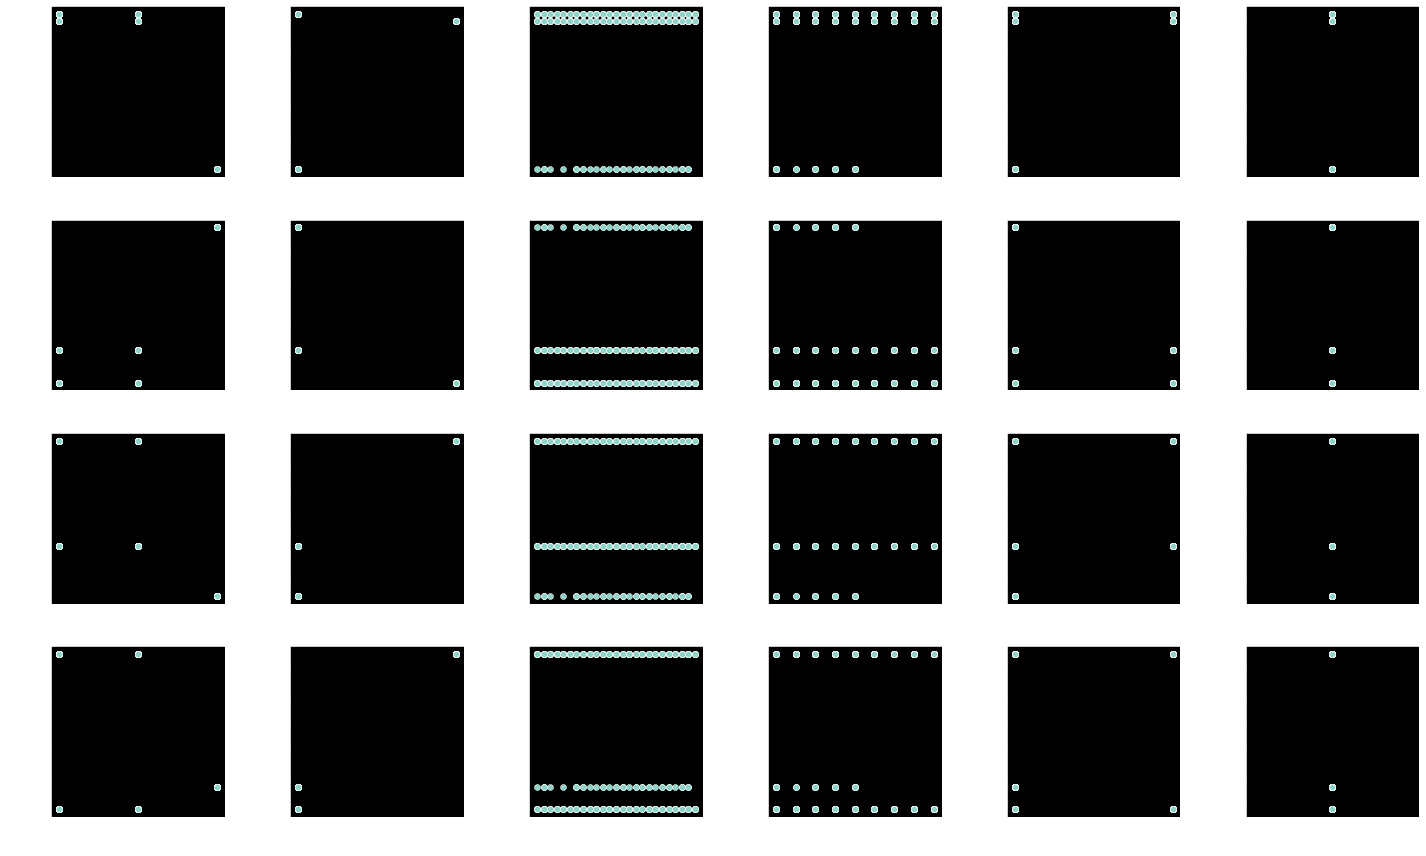

In [75]:
## plots
data_toPlot = result_5Cluster_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (20,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'sil_score',           ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'calinski_score',      ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_score',       ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_posv_score',  ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

In [80]:
# only for cluster number = 5 nad further condition

condn = ( result_Cluster_df.n_cluster == 5 )  &  ( result_Cluster_df.hdbscan_score > 0.20 ) 

result_5Cluster_df = result_Cluster_df.loc[ condn, : ].sort_values( 'hdbscan_score', ascending= False )
result_5Cluster_df.head(10)

,min_cluster_size,min_samples,alpha,cluster_selection_epsilon,cluster_selection_method,n_cluster,sil_score,calinski_score,hdbscan_score,hdbscan_posv_score
2981,9,6,0.862793,0.613281,leaf,5,0.299592,37.211704,0.264517,0.292361
666159,5,6,0.455078,0.817383,leaf,5,0.299592,37.211704,0.264517,0.292361
636783,9,6,0.084167,0.613281,leaf,5,0.299592,37.211704,0.264517,0.292361
640389,9,6,0.232544,0.103027,eom,5,0.299592,37.211704,0.264517,0.292361
640496,9,6,0.455078,0.307129,leaf,5,0.299592,37.211704,0.264517,0.292361
641417,5,6,0.603516,0.409180,eom,5,0.299592,37.211704,0.264517,0.292361
645098,5,6,0.084167,0.715332,eom,5,0.299592,37.211704,0.264517,0.292361
647959,5,6,0.714355,0.613281,eom,5,0.299592,37.211704,0.264517,0.292361
650638,5,6,0.862793,0.715332,leaf,5,0.299592,37.211704,0.264517,0.292361
652972,9,6,0.121277,0.511230,eom,5,0.299592,37.211704,0.264517,0.292361


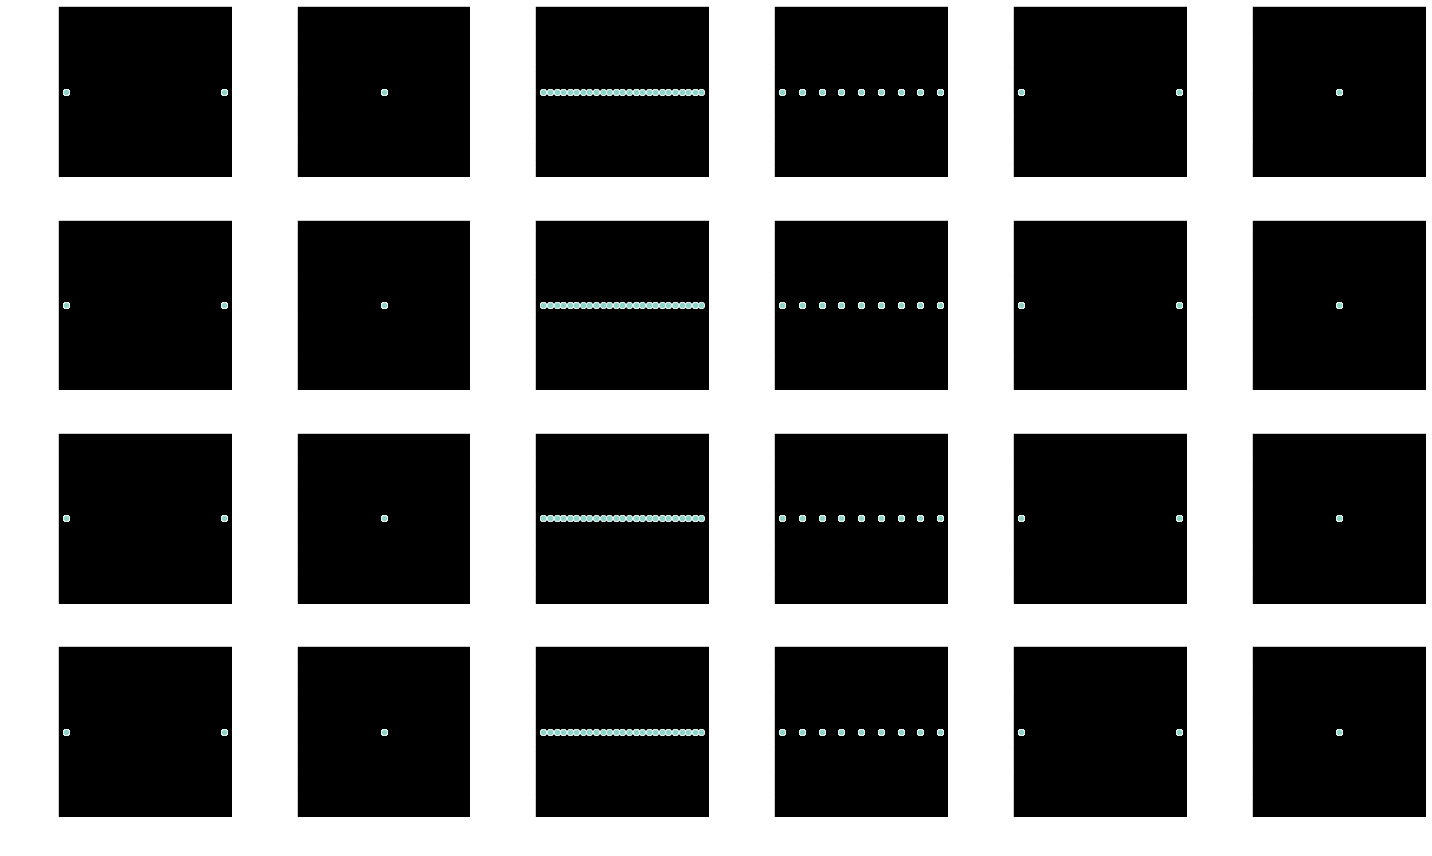

In [81]:
## plots
data_toPlot = result_5Cluster_df

fg,ax = plt.subplots( len_score, data_toPlot.shape[1]-len_score , figsize= (20,len_score*3) )
ax_flat = ax.flatten()

for idx, e_feature in enumerate( data_toPlot.columns[:-len_score] ):
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'sil_score',           ax= ax_flat[idx]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'calinski_score',      ax= ax_flat[ idx+ 1*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_score',       ax= ax_flat[ idx+ 2*(data_toPlot.shape[1]-len_score) ]  )
    sns.scatterplot(  data= data_toPlot, x= e_feature, y= 'hdbscan_posv_score',  ax= ax_flat[ idx+ 3*(data_toPlot.shape[1]-len_score) ]  )
    
plt.tight_layout(); plt.show()

checking amount of noise for `min_cluster_size = 5 & 9`

18


(-0.03178899509736328, 0.03689539520307678)

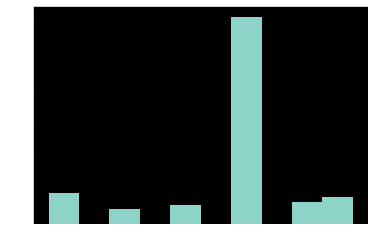

In [72]:
min_cluster_size= 5 ;   min_samples= 6

hdbscan_obj = hdbscan.HDBSCAN(  min_cluster_size= min_cluster_size, min_samples= min_samples, core_dist_n_jobs = -1 )
yhat = hdbscan_obj.fit_predict( xx )

print( np.sum( yhat == -1 ) )
plt.hist( yhat );

yhat_posv = yhat[ yhat!= -1 ]    ;       xx_posv = xx[ yhat!= -1 ]

DBCV.DBCV( xx, yhat ), DBCV.DBCV( xx_posv, yhat_posv )

18


(0.292360754192476,
 array([0.88148418, 0.77853739, 0.1854642 , 0.37579889, 0.37402513]))

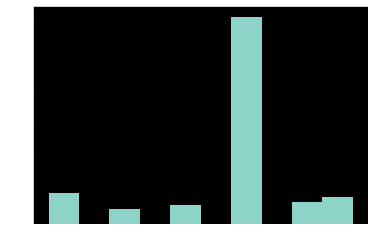

In [89]:
min_cluster_size= 9 ;   min_samples= 6

hdbscan_obj = hdbscan.HDBSCAN(  min_cluster_size= min_cluster_size, min_samples= min_samples, core_dist_n_jobs = -1 )
yhat = hdbscan_obj.fit_predict( xx )

print( np.sum( yhat == -1 ) )
plt.hist( yhat );

hat_posv = yhat[ yhat!= -1 ]    ;       xx_posv = xx[ yhat!= -1 ]

hdbscan.validity_index( xx_posv, yhat_posv, per_cluster_scores= True )

#### Hyperparameter for HDBSCAN is:

#### `min_cluster_size = 9   &   min_samples = 6` for 5 clusters with `cluster_selection_method = 'eom'` <br>

```
min_cluster_size 	min_samples 	  n_cluster 	sil_score   	calinski_score hdbscan_score 	hdbscan_posv_score
	  22 	             6 	            3 	    0.315713 	    51.347003 	   0.170866 	    0.186669
	  13 	             6 	            4 	    0.291386 	    45.840554 	   0.223851 	    0.244554
	   9 	             6 	            5 	    0.299592 	    37.211704 	   0.264517 	    0.292361
	   5 	             6 	            6 	    0.148295 	    30.735492 	   0.186842 	    0.330029
	   5 	             6 	            7 	   -0.027603 	    23.558405 	   0.191998 	    0.525907

```
<br>other hparams, namely - `alpha, cluster_selection_epsilon, cluster_selection_method` doesn't affect the `DBCV score`. However, we are still using hparam `cluster_selection_method` as they influence the number of clusters formed.

<hr><br>

<div id= '1.4'></div>

### Section 1.4 :  Hyper-paramer tuned model results

*[Go to top](#toc)*

<br>
    
<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
    <h3>Concluding all the models</h3>
</b></p>
</div>
<br>

In [89]:
def get_model_score( estimator_= sklearn.cluster.KMeans, clusterRange_ls= np.linspace( 3,7,5, dtype= np.int8 ), **kwargs ):
    
    global xx
    
    scores_cluster = []
    
    for e_clustNo in clusterRange_ls:               # loop for different cluster #
        
        clust_obj = estimator_( n_clusters= e_clustNo, **kwargs )
        yhat = clust_obj.fit_predict( xx )
        
        yhat_posv = yhat[ yhat!= -1 ];  xx_posv = xx[ yhat!= -1 ]
        
        scores_cluster.append( 
                 [    e_clustNo,
                      sklearn.metrics.silhouette_score( X= xx, labels= yhat ),
                      sklearn.metrics.calinski_harabasz_score( xx, yhat ),
                      1 / sklearn.metrics.davies_bouldin_score( xx, yhat ),
                      DBCV.DBCV( xx_posv, yhat_posv )  ]
        )
        
    return(   pd.DataFrame( scores_cluster,  columns= [ 'n_cluster', 'sil','cal','db','dbcv' ] )   )

#### K Means with hyperparam - `'init': 'k-means++', 'n_init': 3*len(pc_df.columns), 'max_iter': 1000, 'algorithm': 'full' `

In [90]:
import warnings; warnings.filterwarnings( action= 'ignore' )

xx = pc_df.iloc[ :, :pcth ].to_numpy()

# K Means
hparamDictn = { 'init': 'k-means++', 'n_init': 3*len(pc_df.columns), 'max_iter': 1000, 'algorithm': 'full', 'random_state': 10 }
kmeans_scores_df = get_model_score(  estimator_= sklearn.cluster.KMeans, clusterRange_ls= np.linspace( 3,7,5, dtype= np.int8 ),  **hparamDictn  )

## spectral clustering
hparamDictn = { 'eigen_solver': 'arpack', 'gamma': 3.7, 'affinity': 'rbf', 'assign_labels': 'discretize', 'random_state' : 10, 'n_jobs': -1 }
spectral_scores_df = get_model_score(  estimator_= sklearn.cluster.SpectralClustering, clusterRange_ls= np.linspace( 3,7,5, dtype= np.int8 ), **hparamDictn  )

## Agglomerative Clustering
hparamDictn = { 'affinity':'l2', 'linkage':'average' }
aggCluster_scores_df = get_model_score(  estimator_= sklearn.cluster.AgglomerativeClustering, clusterRange_ls= np.linspace( 3,7,5, dtype= np.int8 ),  **hparamDictn  )

<br>

#### DBSCAN Clustering hparam result for 

From hparam tuning, we are considering
```
   eps 	  min_sample    n_cluster
  1.15            2 	        3  
  0.90           10 	        4  
  0.85            7 	        5  
  0.85            3 	        6  
  0.85            2 	        7  
```

In [91]:
def grdSrc_model( eps, min_samples ):
    np.random.seed( seed= 10 )
    
    global xx
    yhat = sklearn.cluster.DBSCAN(  eps= eps, min_samples= min_samples, algorithm= 'brute', metric= 'euclidean', n_jobs= os.cpu_count()   )\
                               .fit_predict( xx )
    n_cluster = len( set(yhat) ) - ( 1 if -1 in yhat else 0 )
    
    yhat_posv = yhat[ yhat!= -1 ];        xx_posv = xx[ yhat!= -1, : ]
    # calc the clustering's metrics
    try: silScore = sklearn.metrics.silhouette_score( X= xx, labels= yhat )
    except: silScore = np.nan
    try: calScore = sklearn.metrics.calinski_harabasz_score( xx, yhat ) 
    except: calScore = np.nan
    try: db = 1 / sklearn.metrics.davies_bouldin_score( xx, yhat ) 
    except: db = np.nan
    try: dbcv = DBCV.DBCV( xx_posv, yhat_posv  )
    except: dbcv = np.nan
        
    return(  [ n_cluster, silScore, calScore, db, dbcv ]  )

In [92]:
eps = [ 1.15, 0.90, 0.85, 0.85, 0.85 ];              min_samples =  [  2, 10, 7, 3, 2 ]

result_ls = []
for e_eps, e_minSamples in zip( eps, min_samples ):
    result_ls.append(   grdSrc_model( eps= e_eps, min_samples= e_minSamples )   )
    
scores_colNm = [ 'n_cluster','sil','cal', 'db', 'dbcv' ]
dbscan_scores_df = pd.DataFrame( result_ls, columns=  scores_colNm )
dbscan_scores_df

,n_cluster,sil,cal,db,dbcv
0,3,0.372870,29.487579,0.905704,0.106278
1,4,0.261522,37.039436,0.647222,0.052591
2,5,0.309798,38.603965,0.662565,0.172543
3,6,0.319258,35.845527,0.692512,0.075485
4,7,0.327983,33.191306,0.776885,0.079940


<br>

#### HDBSCAN Clustering hparam result for:

#### `min_cluster_size = 9   &   min_samples = 6` for 5 clusters<br>

```
min_cluster_size 	min_samples 	cluster_selection_method      n_cluster 	sil_score   	calinski_score  hdbscan_score  hdbscan_posv_score
	  22 	             6 	                  'eom'                  3   	 0.315713 	    51.347003 	   0.170866 	     0.186669
	  13 	             6 	                  'eom'                  4   	 0.291386 	    45.840554 	   0.223851 	     0.244554
	   9 	             6 	                  'eom'                  5   	 0.299592 	    37.211704 	   0.264517 	     0.292361
	   5 	             6 	                 'leaf'                  6   	 0.148295 	    30.735492 	   0.186842 	     0.330029
	   5 	             6 	                 'leaf'                  7   	-0.027603 	    23.558405 	   0.191998 	     0.525907
           
```
<br>other hparams, namely - `alpha, cluster_selection_epsilon, cluster_selection_method` doesn't affect the `DBCV score`. However, it influence the number of clusters.

In [93]:
def grdSrc_model( min_cluster_size, min_samples, cluster_selection_method ):
    global xx
    
    yhat = hdbscan.HDBSCAN(   min_cluster_size= min_cluster_size, min_samples= min_samples, cluster_selection_method= cluster_selection_method,
                              core_dist_n_jobs= -1  )\
                      .fit_predict( xx )
    
    n_cluster = len( set(yhat) ) - ( 1 if -1 in yhat else 0 )
    yhat_posv = yhat[ yhat!= -1 ];           xx_posv = xx[ yhat!= -1 ]
    
    # calc the clustering's metrics
    try: silScore = sklearn.metrics.silhouette_score( X= xx, labels= yhat )
    except: silScore = np.nan
    try: calScore = sklearn.metrics.calinski_harabasz_score( xx, yhat ) 
    except: calScore = np.nan
    try: db = 1 / sklearn.metrics.davies_bouldin_score( xx, yhat ) 
    except: db = np.nan
    try: dbcv = hdbscan.validity_index( xx_posv, yhat_posv )
    except: dbcv = np.nan  
        
    return(  [  n_cluster, silScore, calScore, db, dbcv ]  )

In [95]:
min_cluster_size = [ 22, 13, 9, 9, 5 ];  min_samples  =   [ 6,   6, 6, 3, 6 ];  cluster_selection_method = [ 'eom', 'eom', 'eom', 'leaf', 'leaf' ]

scores_colNm = [ 'n_cluster','sil','cal', 'db', 'dbcv' ]
result_ls = []

for e_minClusterSz, e_minSample, e_method in zip( min_cluster_size, min_samples, cluster_selection_method ):
    result_ls.append(   grdSrc_model( min_cluster_size= int(e_minClusterSz), min_samples= int(e_minSample), cluster_selection_method= e_method )   )
    
hdbscan_scores_df = pd.DataFrame( result_ls, columns=  scores_colNm ) 
hdbscan_scores_df

,n_cluster,sil,cal,db,dbcv
0,3,0.315713,51.347003,0.542348,0.186669
1,4,0.291386,45.840554,0.602823,0.244554
2,5,0.299592,37.211704,0.647246,0.292361
3,6,0.201966,34.335111,0.595774,0.260975
4,7,-0.027603,23.558405,0.655234,0.525907


<br>

#### working with Metrics summary 

In [96]:
kmeans_scores_df['model'] = 'KMeans'
spectral_scores_df['model'] = 'Spectral'
aggCluster_scores_df['model'] = 'Agglomerative'
dbscan_scores_df['model'] = 'DBSCAN'
hdbscan_scores_df['model'] = 'HDBSCAN'    

In [97]:
metrics_df = pd.concat(  [ kmeans_scores_df, spectral_scores_df, aggCluster_scores_df, dbscan_scores_df, hdbscan_scores_df ], axis= 'rows'  )
metrics_df.reset_index( drop= True, inplace= True )

# replacing a neg with nan for good viz
metrics_df.loc[  (metrics_df['n_cluster'] == 7) & (metrics_df.model=='HDBSCAN'), 'sil' ] = np.nan

metrics_df.to_csv( location + 'model_metrics.csv', index= False, header= True )
metrics_df

,n_cluster,sil,cal,db,dbcv,model
0,3,0.324614,69.650816,0.784156,-0.263238,KMeans
1,4,0.311099,63.313596,0.848500,-0.443067,KMeans
...,...,...,...,...,...,...
23,6,0.201966,34.335111,0.595774,0.260975,HDBSCAN
24,7,NaN,23.558405,0.655234,0.525907,HDBSCAN


In [98]:
plt.style.use( 'classic' )
sns.set_context( context= 'paper', font_scale= 2 )

metrics_df = pd.read_csv( location + 'model_metrics.csv'  )

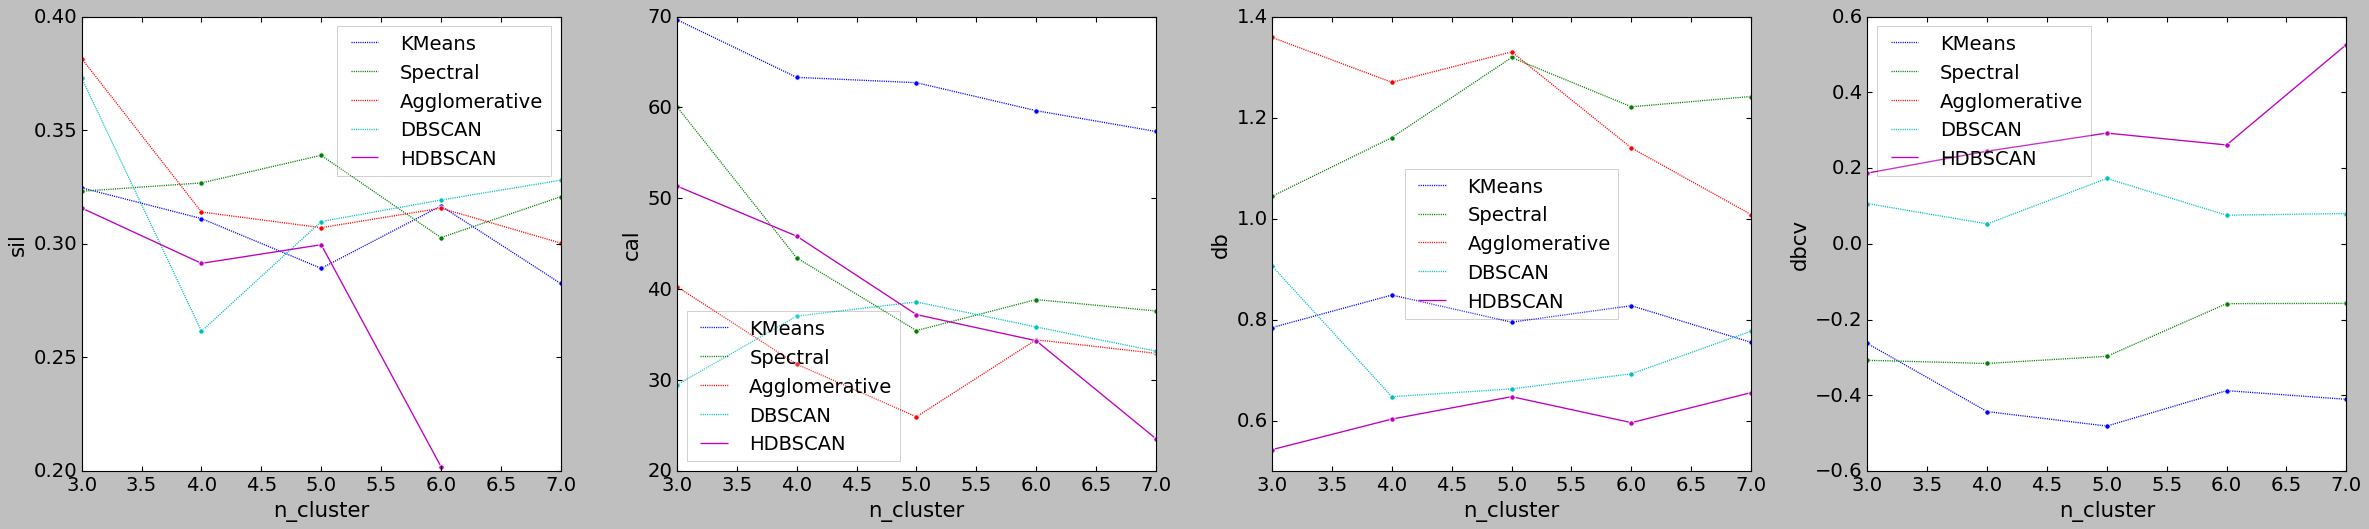

In [99]:
fg,ax = plt.subplots( 1,4, figsize= (30,7) )

loc_ls = [ 'upper right', 'lower left', 'center', 'upper left' ]

for e_metric, e_loc, e_ax in zip( ['sil','cal','db','dbcv'], loc_ls, ax.flatten() ):
    sns.lineplot(  x= 'n_cluster', y= e_metric, hue= 'model', marker= 'o', data= metrics_df, ax= e_ax,
                   style= 'model', dashes= [ (1,1), (1, 1), (1, 1), (1, 1), (1, 0) ]  )
    e_ax.legend( loc= e_loc,  framealpha= 0.2 )
plt.tight_layout()

<hr><br>

<div id= '1.5'></div>

### Section 1.5 :  Post Clustering analysis for HDBSCAN

*[Go to top](#toc)*

<br>
<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Post Clustering analysis
</b></p>
</div>

In [102]:
pc_df.head(3)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
0,-0.429958,-0.328515,0.116974,-0.028362,0.220083,-0.090315,-0.016470,-0.352765,-0.271782,0.021384,0.163076,0.103390,0.133771,-0.091140,0.006039,-0.038254,-0.034429,0.003590
1,-0.525303,-0.223839,-0.017152,-0.035176,0.332065,-0.002000,0.144669,-0.242372,0.141000,-0.386340,0.216565,-0.122856,0.197625,-0.043418,0.063711,-0.060634,-0.097933,-0.156344
2,-0.416360,-0.643991,-0.256157,-0.181668,-0.192635,-0.145621,-0.239836,-0.145339,-0.200242,-0.253183,0.296745,-0.163148,0.033341,-0.116675,0.078708,-0.235691,0.093611,-0.065405


<br>

#### cluster for each algos

In [103]:
clusteringAlgo_ls = [ sklearn.cluster.KMeans, sklearn.cluster.SpectralClustering, sklearn.cluster.AgglomerativeClustering, sklearn.cluster.DBSCAN, hdbscan.HDBSCAN ]

hparams_ls = [ { 'n_clusters': 5, 'init': 'k-means++', 'n_init': 3*xx.shape[1], 'max_iter': 1000, 'algorithm': 'full', 'random_state': 10 },
               { 'n_clusters': 5, 'eigen_solver': 'arpack', 'gamma': 4, 'affinity': 'rbf', 'assign_labels': 'discretize', 'random_state': 10, 'n_jobs': -1 },
               { 'n_clusters': 5, 'affinity':'l2', 'linkage':'average' },
               { 'eps': 0.85 , 'min_samples': 7, 'algorithm': 'brute', 'metric': 'euclidean', 'n_jobs': -1 },
               { 'min_cluster_size': 9, 'min_samples': 6, 'algorithm': 'best', 'metric': 'euclidean', 'cluster_selection_method':'eom', 'core_dist_n_jobs': -1 }              
             ]

yhat_ls = [];  algo_nm = []

for e_algo, e_hparam in zip( clusteringAlgo_ls, hparams_ls ):
    yhat =  e_algo( **e_hparam ).fit_predict(xx)
    yhat_ls.append( yhat );                               algo_nm.append( str(e_algo.__name__) )
    
# making a df out of the list    
cluster_df = pd.DataFrame(  yhat_ls ).T
cluster_df.columns = algo_nm

## combine cluster_df & pc_df

pc_cluster_df = pc_df.merge( cluster_df, left_index= True, right_index= True )
gri_cluster_df = gri_imputed_ori_df.merge( cluster_df, left_index= True, right_index= True )

griCluster_sansNoise_df = gri_cluster_df.loc[ gri_cluster_df['HDBSCAN']>-1, :]
gri_cluster_df.head(3)

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River,KMeans,SpectralClustering,AgglomerativeClustering,DBSCAN,HDBSCAN
0,304.444059,26.591992,3.312396,68.187420,121.156454,11.430098,1.151034,0.666141,1.408231,0.594660,0.546703,0.652694,0.325869,1.4400,3.2166,1.9566,49.6332,16.0956,3.3759,11.2581,10.8963,0.01471,0.03287,0.01999,0.50712,0.16446,0.03449,0.11503,0.11133,0.0,1.0,4,0,0,0,2
1,1643.749899,168.099378,54.056463,97.410600,55.505064,10.266544,1.135026,0.668627,1.481018,0.666406,0.439591,0.610412,0.313605,1.9080,2.7999,0.0837,70.8012,5.6961,0.3195,2.9178,28.0332,0.01695,0.02487,0.00074,0.62901,0.05061,0.00284,0.02592,0.24905,0.0,1.0,4,0,0,0,2
2,2.480196,39.887988,0.368044,140.062012,9.415355,0.653591,0.823742,0.264225,1.455805,0.589890,0.573224,0.757488,0.461521,1.0521,6.9669,2.2023,78.4728,15.2316,7.6941,1.7235,7.0902,0.00874,0.05785,0.01829,0.65159,0.12647,0.06389,0.01431,0.05887,0.0,1.0,4,0,0,0,2


#### data distribution for different clusters using hdbscan

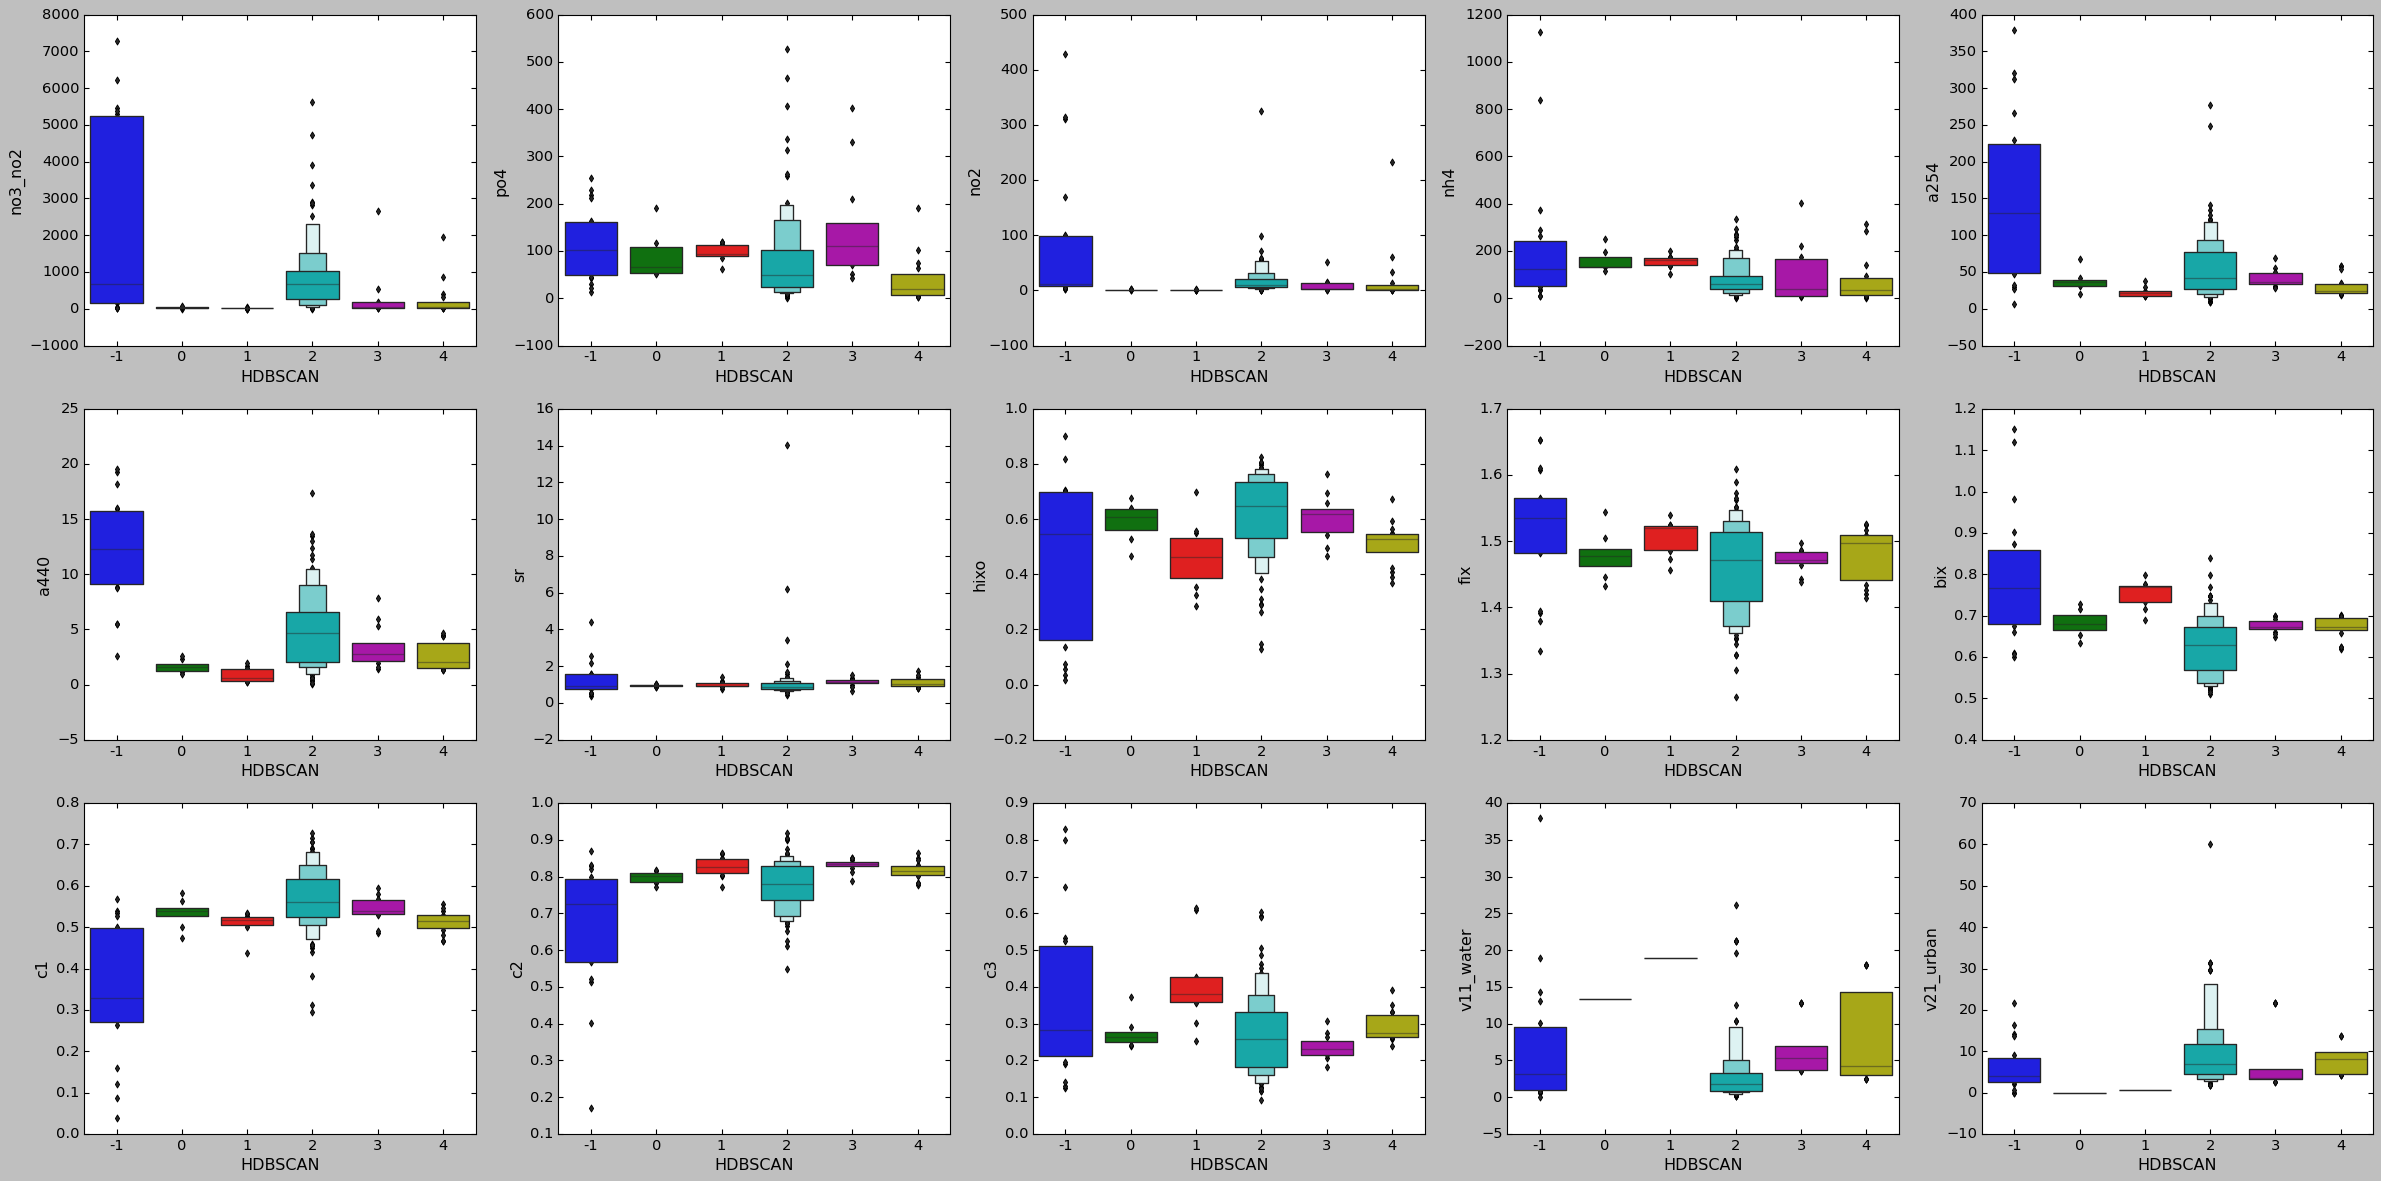

In [104]:
feature_to_plot = [ 'no3_no2', 'po4', 'no2', 'nh4', 'a254', 'a440', 'sr', 'hixo', 'fix', 'bix', 'c1', 'c2', 'c3', 'v11_water', 'v21_urban' ]

## With noise
sns.set_context( context= 'paper', font_scale= 1.5 )
fg,ax = plt.subplots( 3,5, figsize= (30,3*5) )
for e_ax, e_feature in zip( ax.flatten(), feature_to_plot ):
    sns.boxenplot( y= e_feature, x= 'HDBSCAN', data= gri_cluster_df, ax= e_ax )
plt.tight_layout()

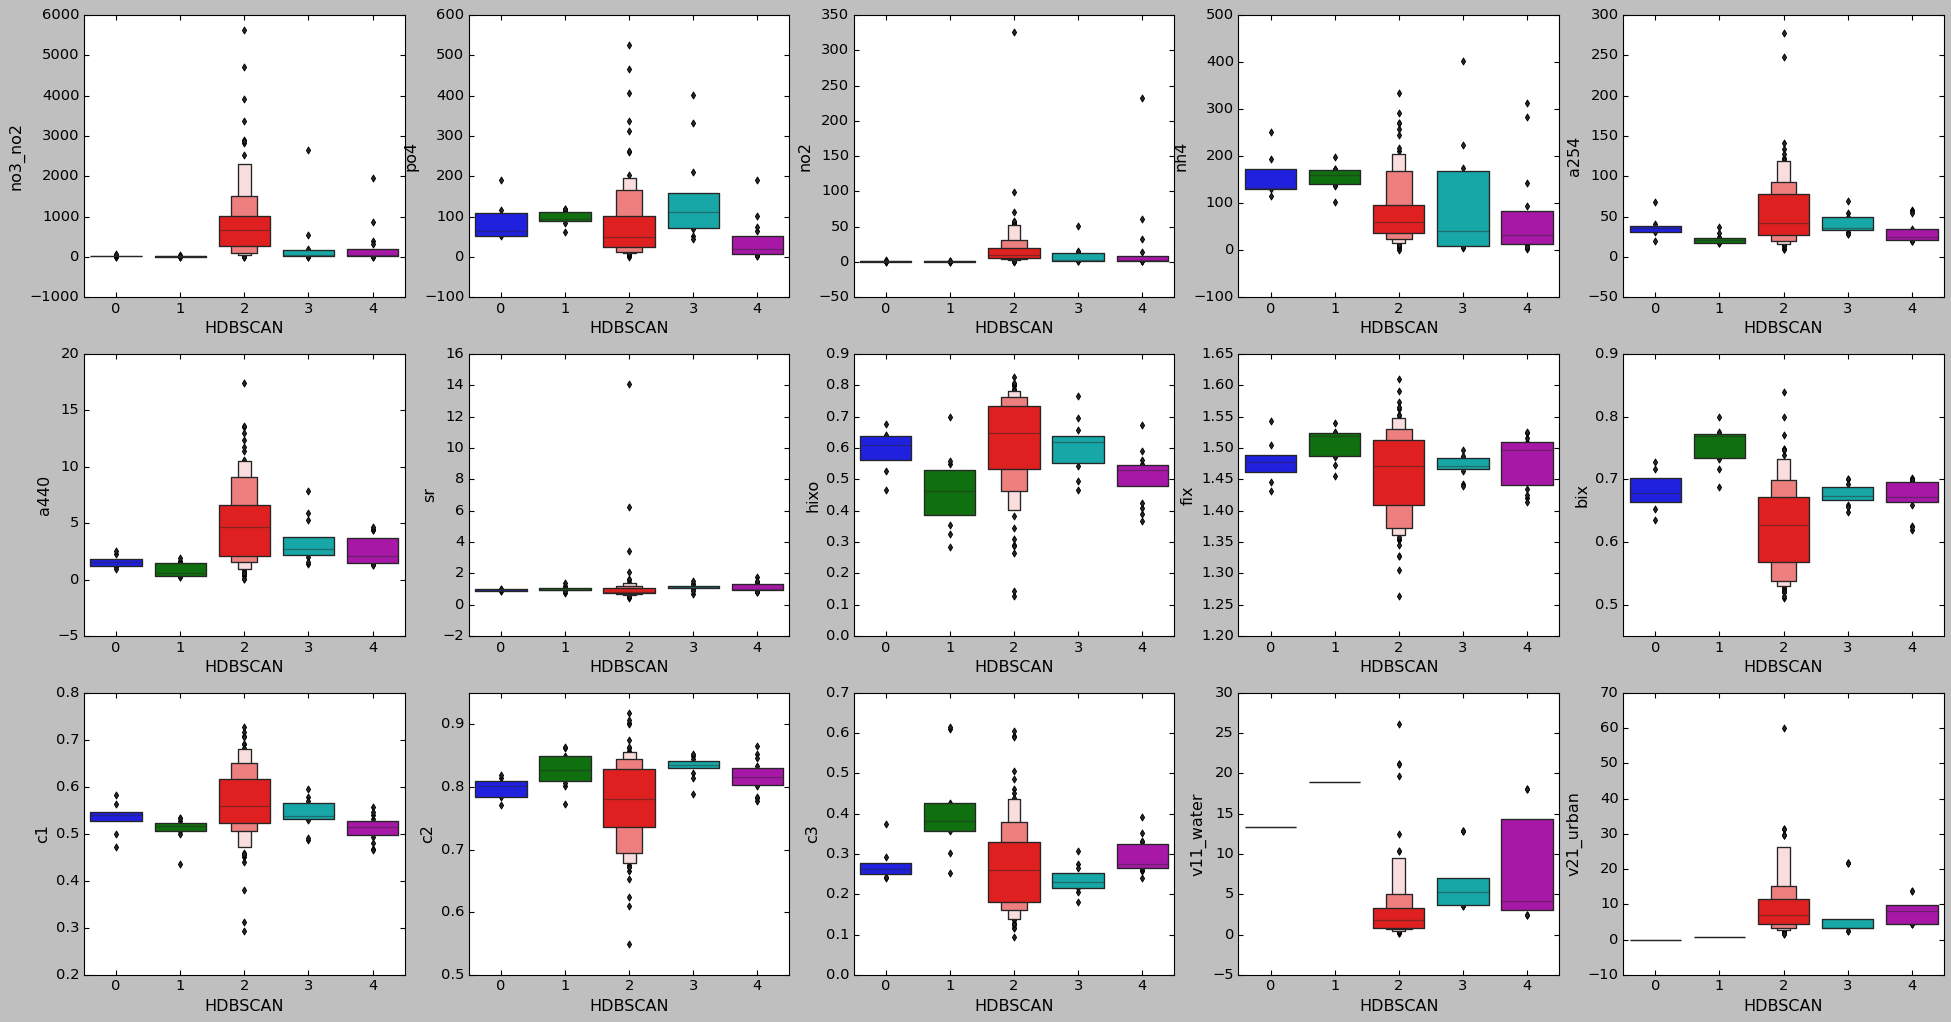

In [105]:
## without noise
fg,ax = plt.subplots( 3,5, figsize= (30,3*5) )
for e_ax, e_feature in zip( ax.flatten(), feature_to_plot ):
    sns.boxenplot( y= e_feature, x= 'HDBSCAN', data= griCluster_sansNoise_df, ax= e_ax )

###  `t-SNR` visualization

In [106]:
plt.style.use( 'classic' )
pc_cluster_df.head(3)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,KMeans,SpectralClustering,AgglomerativeClustering,DBSCAN,HDBSCAN
0,-0.429958,-0.328515,0.116974,-0.028362,0.220083,-0.090315,-0.016470,-0.352765,-0.271782,0.021384,0.163076,0.103390,0.133771,-0.091140,0.006039,-0.038254,-0.034429,0.003590,4,0,0,0,2
1,-0.525303,-0.223839,-0.017152,-0.035176,0.332065,-0.002000,0.144669,-0.242372,0.141000,-0.386340,0.216565,-0.122856,0.197625,-0.043418,0.063711,-0.060634,-0.097933,-0.156344,4,0,0,0,2
2,-0.416360,-0.643991,-0.256157,-0.181668,-0.192635,-0.145621,-0.239836,-0.145339,-0.200242,-0.253183,0.296745,-0.163148,0.033341,-0.116675,0.078708,-0.235691,0.093611,-0.065405,4,0,0,0,2


In [107]:
tsne_fit = sklearn.manifold.TSNE( n_components= 2, n_iter= 10000, random_state= 10, n_jobs= -1 )\
                              .fit_transform(  pc_cluster_df.drop( columns= algo_nm )  )
x2, y2 = tsne_fit[:,0], tsne_fit[:,1]
tsneComponent_df = pd.DataFrame( { 'x2':list(x2), 'y2':list(y2) } )
tsneComponent_df = tsneComponent_df.merge( cluster_df, left_index= True, right_index= True )

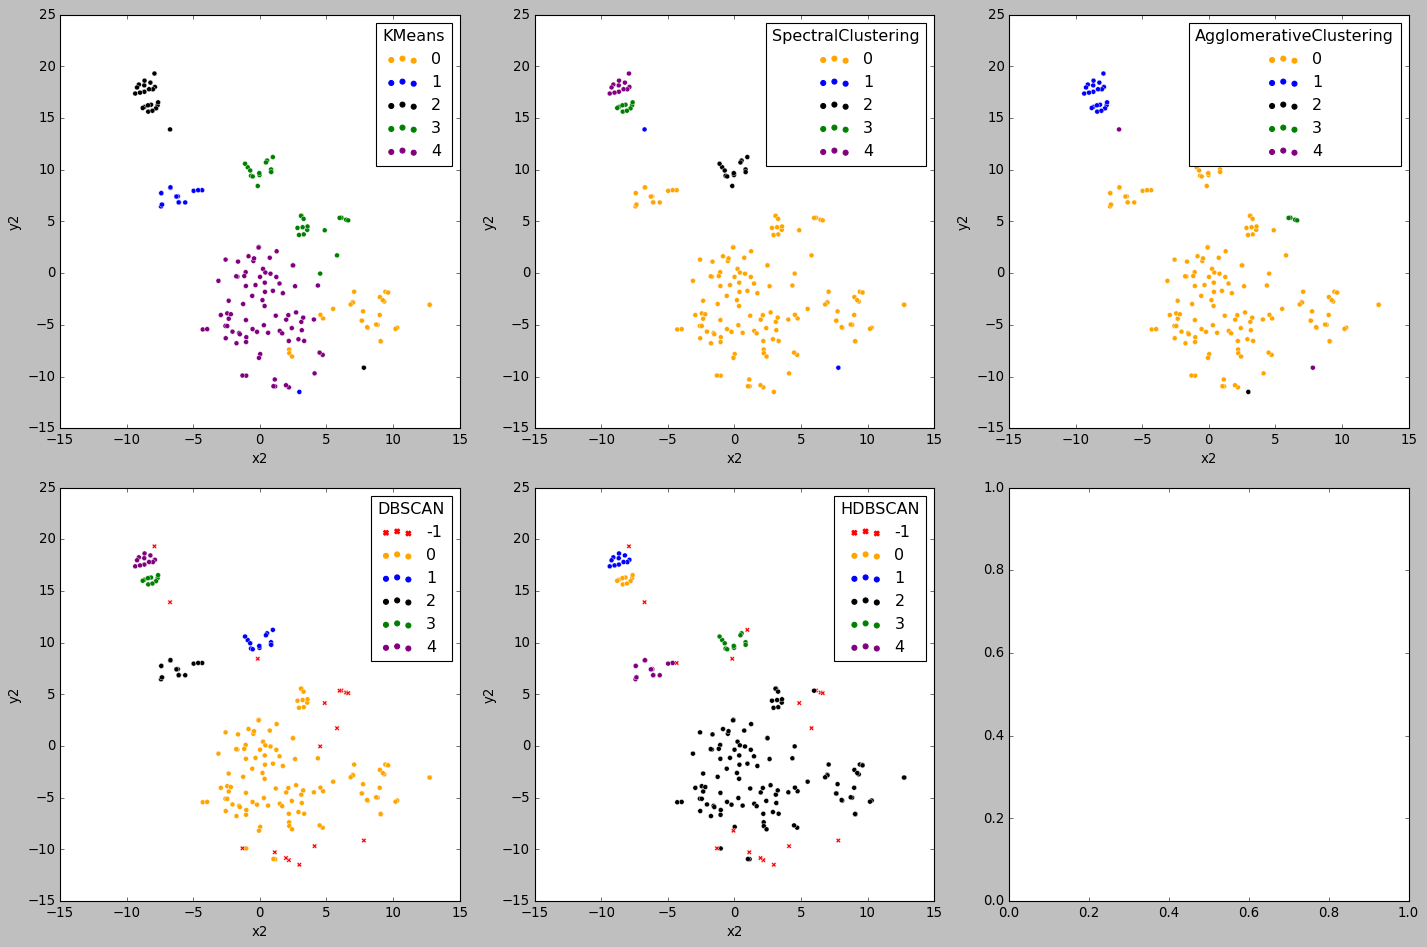

In [113]:
fg,ax = plt.subplots( 2,3, figsize= (3*6,2*6) )
marker_ls = [ 'X','o','o','o','o','o' ];            color_ls = [ 'red','orange','blue','black','green','purple' ]

for e_ax, e_algo in zip( ax.flatten(), algo_nm ):
#     if else for -1 case in dbscan and hdbscan
    if tsneComponent_df[e_algo].nunique() == 6:
        sns.scatterplot(  data= tsneComponent_df, x= 'x2', y= 'y2', hue= e_algo, palette= color_ls,     style= e_algo, markers= marker_ls,     ax= e_ax  )
    else:
        sns.scatterplot(  data= tsneComponent_df, x= 'x2', y= 'y2', hue= e_algo, palette= color_ls[1:], style= e_algo, markers= marker_ls[1:], ax= e_ax  )
plt.tight_layout();plt.show()

### LULC vs. cluster plot

In [44]:
griCluster_sansNoise_df.head(3)

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River,KMeans,SpectralClustering,AgglomerativeClustering,DBSCAN,HDBSCAN
0,304.444059,26.591992,3.312396,68.187420,121.156454,11.430098,1.151034,0.666141,1.408231,0.594660,0.546703,0.652694,0.325869,1.4400,3.2166,1.9566,49.6332,16.0956,3.3759,11.2581,10.8963,0.01471,0.03287,0.01999,0.50712,0.16446,0.03449,0.11503,0.11133,0.0,1.0,4,0,0,0,2
1,1643.749899,168.099378,54.056463,97.410600,55.505064,10.266544,1.135026,0.668627,1.481018,0.666406,0.439591,0.610412,0.313605,1.9080,2.7999,0.0837,70.8012,5.6961,0.3195,2.9178,28.0332,0.01695,0.02487,0.00074,0.62901,0.05061,0.00284,0.02592,0.24905,0.0,1.0,4,0,0,0,2
2,2.480196,39.887988,0.368044,140.062012,9.415355,0.653591,0.823742,0.264225,1.455805,0.589890,0.573224,0.757488,0.461521,1.0521,6.9669,2.2023,78.4728,15.2316,7.6941,1.7235,7.0902,0.00874,0.05785,0.01829,0.65159,0.12647,0.06389,0.01431,0.05887,0.0,1.0,4,0,0,0,2


In [45]:
lulc_col = [ 'r11_water', 'r21_urban', 'r31_barren', 'r41_forest', 'r52_rangeland', 'r81_hayPasture', 'r82_argo', 'r90_wetland' ]
lulc_cluster_melted_df = pd.melt( griCluster_sansNoise_df.loc[ :,  lulc_col + ['HDBSCAN'] ],
                                  id_vars= 'HDBSCAN', var_name= 'lulc', value_name= 'percent_distribution' )
lulc_cluster_melted_df.head(3)

,HDBSCAN,lulc,percent_distribution
0,2,r11_water,0.01471
1,2,r11_water,0.01695
2,2,r11_water,0.00874


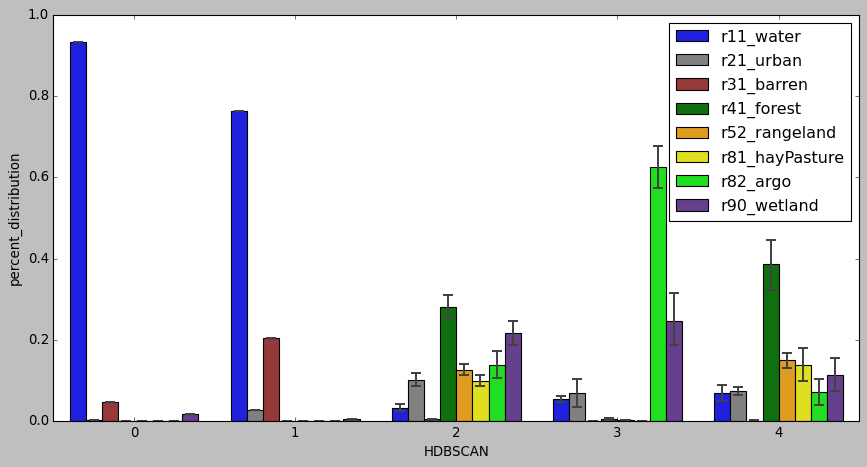

In [50]:
fg,ax = plt.subplots( figsize= (11,6) )
color_ls = [ 'blue','grey','brown','green','orange','yellow','lime','rebeccapurple' ]
sns.barplot( ax= ax,  x= 'HDBSCAN', y= 'percent_distribution', data= lulc_cluster_melted_df, hue= 'lulc', palette= color_ls, capsize= .05 )
ax.legend( loc= 'best' )
plt.tight_layout()

### LULC vs. PARAFAC components plot

In [51]:
griCluster_sansNoise_df

,no3_no2,po4,no2,nh4,a254,a440,sr,hixo,fix,bix,c1,c2,c3,v11_water,v21_urban,v31_barren,v41_forest,v52_rangeland,v81_hayPasture,v82_argo,v90_wetland,r11_water,r21_urban,r31_barren,r41_forest,r52_rangeland,r81_hayPasture,r82_argo,r90_wetland,waterbody_type_MSSound,waterbody_type_River,KMeans,SpectralClustering,AgglomerativeClustering,DBSCAN,HDBSCAN
0,304.444059,26.591992,3.312396,68.18742,121.156454,11.430098,1.151034,0.666141,1.408231,0.594660,0.546703,0.652694,0.325869,1.4400,3.2166,1.9566,49.6332,16.0956,3.3759,11.2581,10.8963,0.01471,0.03287,0.01999,0.50712,0.16446,0.03449,0.11503,0.11133,0.0,1.0,4,0,0,0,2
1,1643.749899,168.099378,54.056463,97.41060,55.505064,10.266544,1.135026,0.668627,1.481018,0.666406,0.439591,0.610412,0.313605,1.9080,2.7999,0.0837,70.8012,5.6961,0.3195,2.9178,28.0332,0.01695,0.02487,0.00074,0.62901,0.05061,0.00284,0.02592,0.24905,0.0,1.0,4,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,26.885325,101.619398,2.070248,165.59802,21.436324,1.930375,1.412073,0.284295,1.524893,0.775745,0.500047,0.826222,0.615844,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0,2,4,1,4,1
188,4.960392,93.071972,0.828099,173.53518,16.951462,0.435037,0.949655,0.462679,1.539142,0.769379,0.517153,0.847364,0.380632,18.8982,0.6750,5.0679,0.0000,0.0000,0.0000,0.0000,0.1314,0.76287,0.02725,0.20458,0.00000,0.00000,0.00000,0.00000,0.00530,1.0,0.0,2,4,1,4,1


In [52]:
c_col = [ 'c1', 'c2', 'c3' ]

c_cluster_melted_df = pd.melt( griCluster_sansNoise_df[ c_col + ['HDBSCAN'] ],
                               id_vars= 'HDBSCAN', var_name= 'c', value_name= 'parafac_value' )
c_cluster_melted_df.head(3)

,HDBSCAN,c,parafac_value
0,2,c1,0.546703
1,2,c1,0.439591
2,2,c1,0.573224


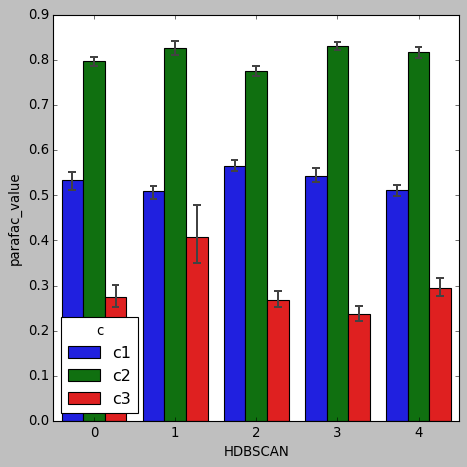

In [56]:
fg,ax = plt.subplots( figsize= (6,6) )
sns.barplot( ax= ax,  x= 'HDBSCAN', y= 'parafac_value', hue= 'c', data= c_cluster_melted_df, capsize= .07 )
plt.tight_layout()

### Visualizing Clustering Algorithms by making udf

In [402]:
# udf

def plot_clusters( data, algorithm, args, kwds, ax ):
    
    start_time = time.time()
    yhat = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette( 'deep', np.unique(yhat).max() + 1 )
    colors = [ palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in yhat ]

    ax.scatter( data.T[0], data.T[1], c=colors, **plot_kwds )
    
    ax.get_xaxis().set_visible(False);         ax.get_yaxis().set_visible(False)
    ax.set_title( 'Clusters found by {}'.format(str(algorithm.__name__)), fontsize= 17 )
    ax.text( -0.8, 1.3, 'Clustering took {:.2f} sec'.format(end_time - start_time), fontsize=14 )

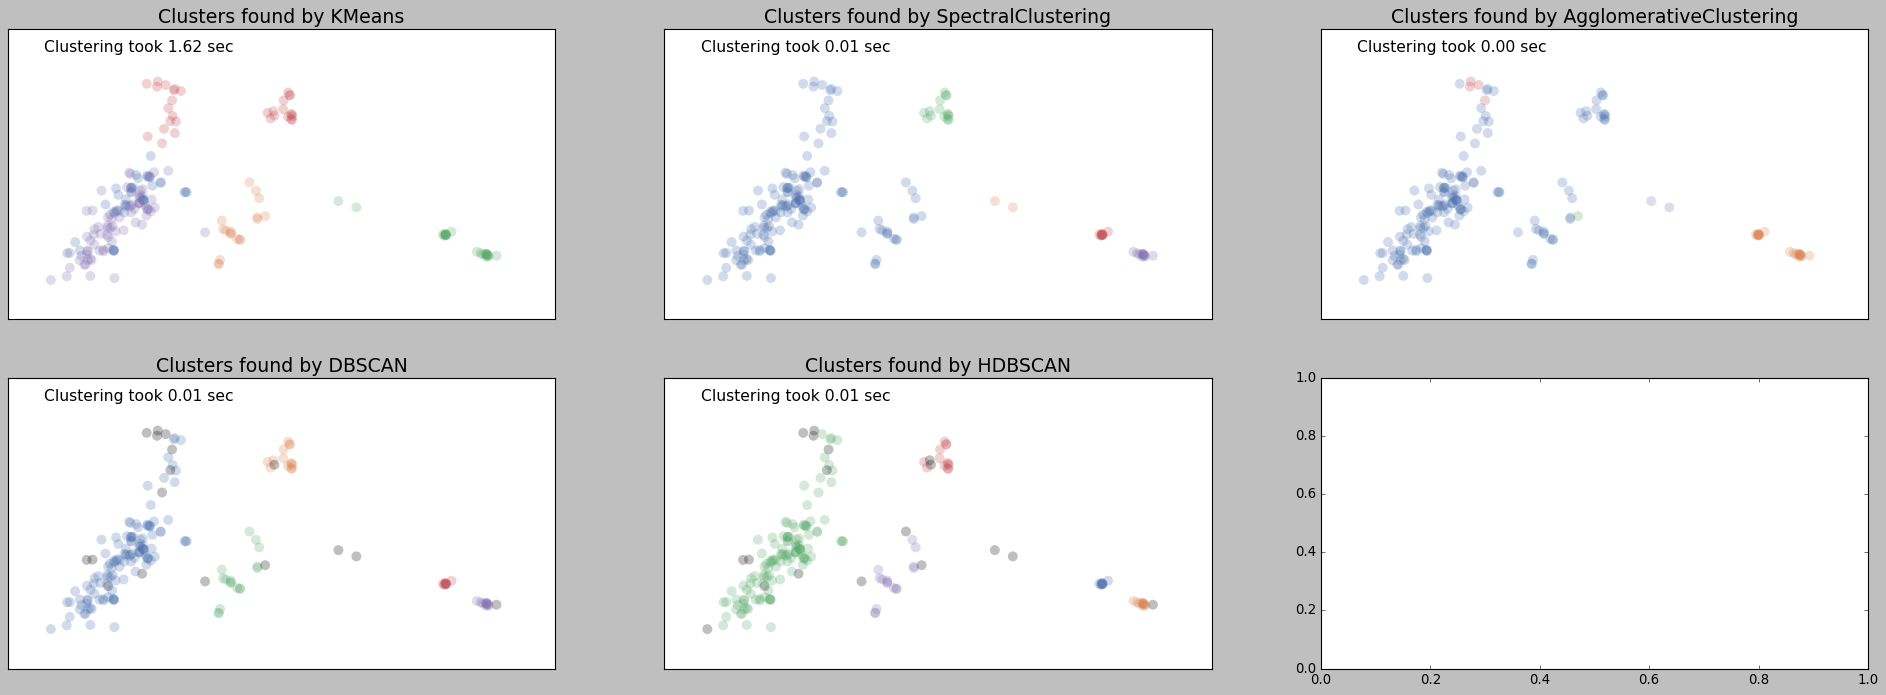

In [403]:
# calling  and directly plotting udf 

clusteringAlgo_ls = [ sklearn.cluster.KMeans, sklearn.cluster.SpectralClustering, sklearn.cluster.AgglomerativeClustering, sklearn.cluster.DBSCAN, hdbscan.HDBSCAN ]

hparams_ls = [ { 'n_clusters': 5, 'init': 'k-means++', 'n_init': 3*xx.shape[1], 'max_iter': 1000, 'algorithm': 'full', 'random_state': 10 },
               { 'n_clusters': 5, 'eigen_solver': 'arpack', 'gamma': 4, 'affinity': 'rbf', 'assign_labels': 'discretize', 'random_state': 10, 'n_jobs': -1 },
               { 'n_clusters': 5, 'affinity':'l2', 'linkage':'average' },
               { 'eps': 0.85 , 'min_samples': 7, 'algorithm': 'brute', 'metric': 'euclidean', 'n_jobs': -1 },
               { 'min_cluster_size': 9, 'min_samples': 6, 'algorithm': 'best', 'metric': 'euclidean', 'cluster_selection_method':'eom', 'core_dist_n_jobs': -1 }              
             ]

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


fg,ax = plt.subplots( 2,3, figsize=(30,10) )

for e_ax, e_clustAlgo, e_hparam in zip( ax.flatten(), clusteringAlgo_ls, hparams_ls ):
    plot_clusters( xx, e_clustAlgo, (), e_hparam, ax= e_ax )
    
plt.tight_layout();  plt.show()

<hr><br>

<div id= '1.6'></div>

### Section 1.6 :  HDBSCAN Cluster's analytical plots for different number of Clusters

*[Go to top](#toc)*

<br>

### HDBSCAN for cluster = 3, 4, 5, 6, 7


In [90]:
hparams_ls = [
                  {  'min_cluster_size': 22, 'min_samples': 6, 'cluster_selection_method':'eom'  },            
                  {  'min_cluster_size': 13, 'min_samples': 6, 'cluster_selection_method':'eom'  },      
                  {  'min_cluster_size': 9,  'min_samples': 6, 'cluster_selection_method':'eom'  },            
                  {  'min_cluster_size': 6,  'min_samples': 6, 'cluster_selection_method':'leaf' },
                  {  'min_cluster_size': 5,  'min_samples': 6, 'cluster_selection_method':'leaf' }    ]

yhat_ls, cluster_num, hdbscan_obj_ls = [], [], []

for e_hparam in hparams_ls:
    hdbscan_obj =  hdbscan.HDBSCAN(  **e_hparam, core_dist_n_jobs= -1, gen_min_span_tree= True  )
    yhat = hdbscan_obj.fit_predict(xx)
    n_cluster = len( set(yhat) ) - ( 1 if -1 in yhat else 0 )
    
    hdbscan_obj_ls.append( hdbscan_obj )
    yhat_ls.append( yhat )
    cluster_num.append( str(n_cluster) )
    
# making a df out of the list    
clusterHDBSCAN_df = pd.DataFrame(  yhat_ls ).T
clusterHDBSCAN_df.columns = cluster_num

## combine cluster_df & pc_df
pc_HDBSCAN_cluster_df = pc_df.merge( clusterHDBSCAN_df, left_index= True, right_index= True )
gri_HDBSCAN_cluster_df = gri_imputed_ori_df.merge( clusterHDBSCAN_df, left_index= True, right_index= True )

# griCluster_sansNoise_df = gri_HDBSCAN_cluster_df.loc[ gri_HDBSCAN_cluster_df['HDBSCAN']>-1, :]
# griCluster_sansNoise_df.head(3)

pc_HDBSCAN_cluster_df
clusterHDBSCAN_df

,3,4,5,6,7
0,2,1,2,-1,-1
1,2,1,2,-1,-1
...,...,...,...,...,...
187,0,0,1,1,1
188,0,0,1,1,1


#### # noise for different Clusterings

[16, 16, 18, 82, 120]


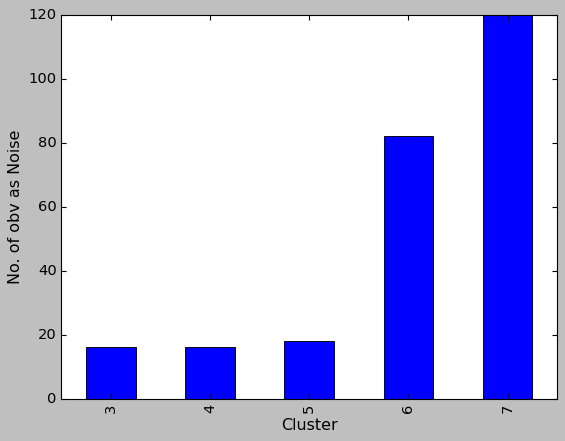

In [114]:
clusterHDBSCAN_df[ clusterHDBSCAN_df == -1 ].count().plot( kind= 'bar', ylabel= 'No. of obv as Noise', xlabel= 'Cluster' );
print( list( clusterHDBSCAN_df[ clusterHDBSCAN_df == -1 ].count() ) )

In [230]:
tsne_fit = sklearn.manifold.TSNE( n_components= 2, n_iter= 10000, random_state= 10, n_jobs= -1 )\
                              .fit_transform( pc_df )
x2, y2 = tsne_fit[:,0], tsne_fit[:,1]
tsneComponent_HDBSCAN_df = pd.DataFrame( { 'x2':list(x2), 'y2':list(y2) } )
tsneComponent_HDBSCAN_df = tsneComponent_HDBSCAN_df.merge( clusterHDBSCAN_df, left_index= True, right_index= True )
tsneComponent_HDBSCAN_df.head(3)

,x2,y2,3,4,5,6,7
0,2.175809,-6.561902,2,1,2,-1,-1
1,3.325751,-6.557294,2,1,2,-1,-1
2,-4.287546,-5.445294,2,1,2,-1,-1


<div class= 'span5 alert alert-info'>
<h3>Action:</h3>

<p><b>
Plotting HDBSCAN detail report plots for clusters = 3, 4, 5, 6, 7
</b></p>
</div>


In [231]:
plt.style.use( 'classic' )

color_palt = [ 'red','orange','blue','black','green','purple','green','darkmagenta' ]
marker_palt = [ 'X','o','o','o','o','o','o','o' ]

In [232]:
def plot_HDBSCAN_cluster_detail( cluster_num= 3, figsz = (25,5) ):
    '''plots 5 details plots for HDBSCAN clustering'''
    
    hdbscan_obj = hdbscan_obj_ls[cluster_num-3]
    
    fg,ax = plt.subplots( 1,3, figsize= figsz )
    
    color_palt = [ 'red','orange','blue','black','green','purple','green','darkmagenta' ]
    marker_palt = [ 'X','o','o','o','o','o','o','o' ]
    
    sns.scatterplot(  data= tsneComponent_HDBSCAN_df, x= 'x2', y= 'y2', hue= str(cluster_num), palette= color_palt[:cluster_num+1],
                      style= str(cluster_num), markers= marker_palt[:cluster_num+1], ax= ax[0]  )

    hdbscan_obj.minimum_spanning_tree_.plot( edge_cmap= 'viridis', edge_alpha= 0.6, node_size= 80, edge_linewidth= 7, axis= ax[1] )

    hdbscan_obj.condensed_tree_.plot( leaf_separation= .7, select_clusters= True, label_clusters= True, axis= ax[2] )

    tsneComponent_Hposv_df = tsneComponent_HDBSCAN_df.loc[ tsneComponent_HDBSCAN_df[str(cluster_num)] >= 0, ['x2','y2',str(cluster_num)] ]
    fctgrd1 = sns.jointplot( x= 'x2', y= 'y2', data= tsneComponent_Hposv_df, hue= str(cluster_num), kind= 'scatter' )
    fctgrd2 = sns.jointplot( x= 'x2', y= 'y2', data= tsneComponent_Hposv_df, hue= str(cluster_num), kind= 'kde', joint_kws={'alpha': .8}, fill = True  )

    plt.tight_layout(); plt.show()

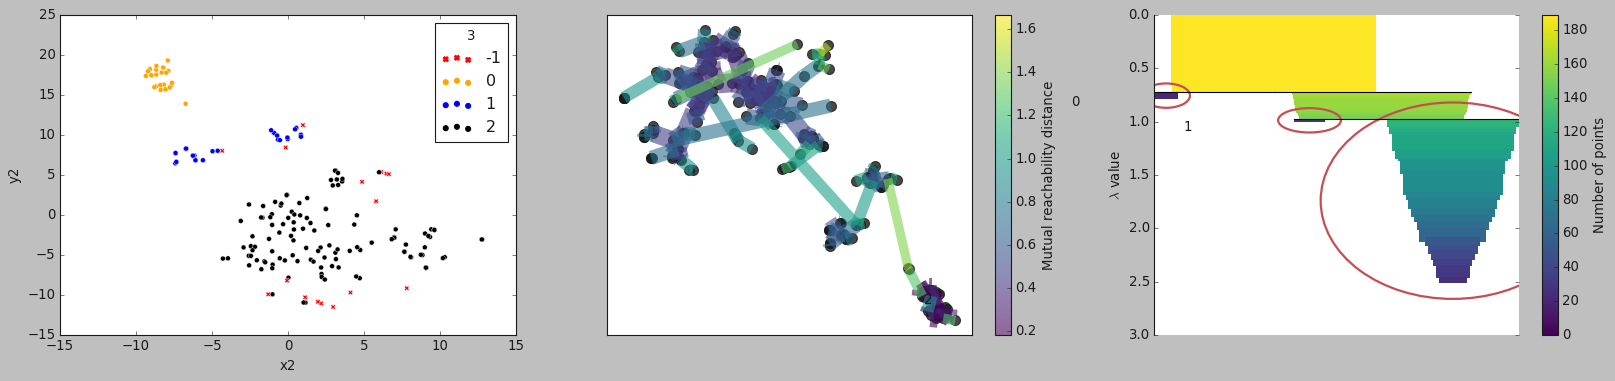

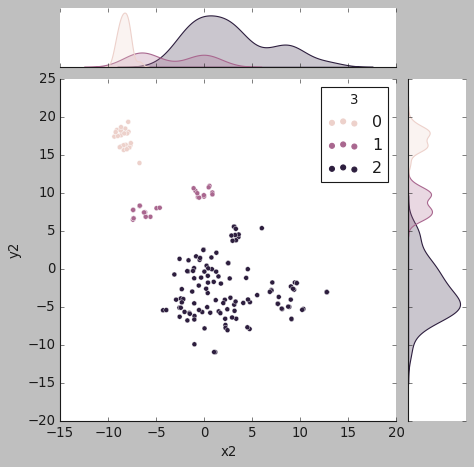

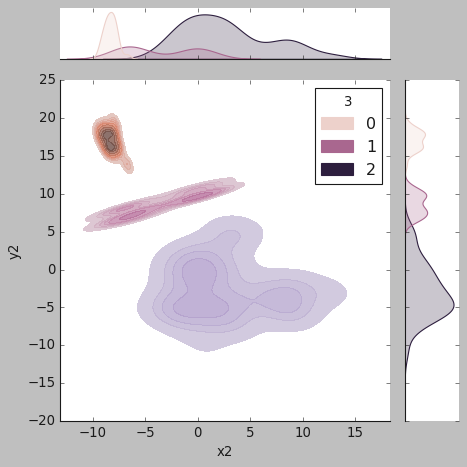

In [218]:
plot_HDBSCAN_cluster_detail( cluster_num= 3 )

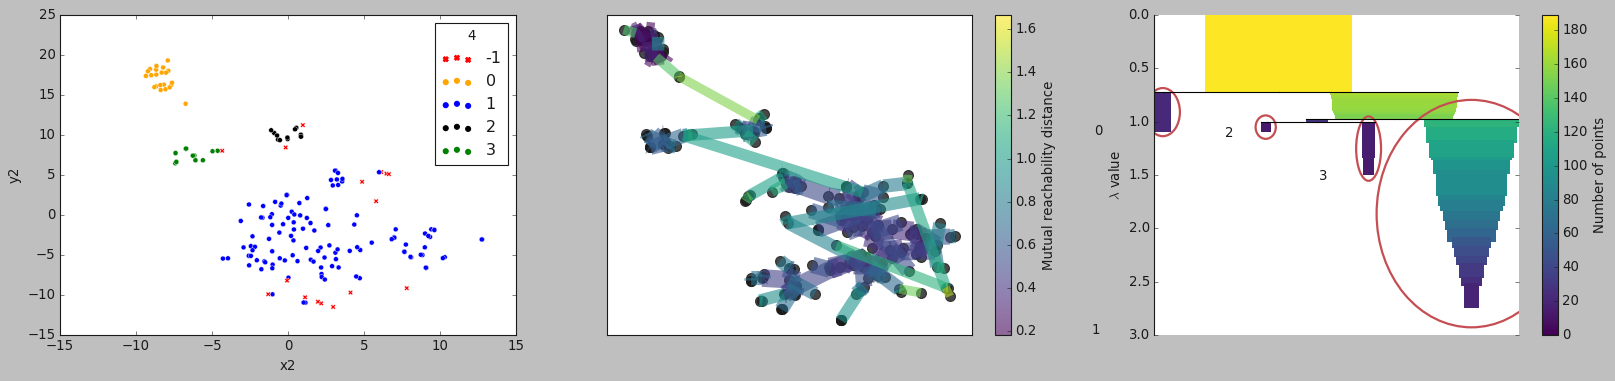

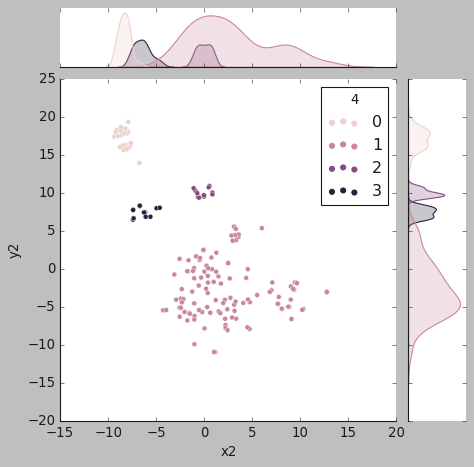

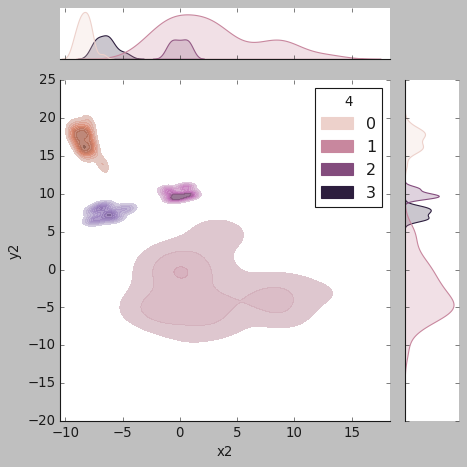

In [203]:
plot_HDBSCAN_cluster_detail( cluster_num= 4 )

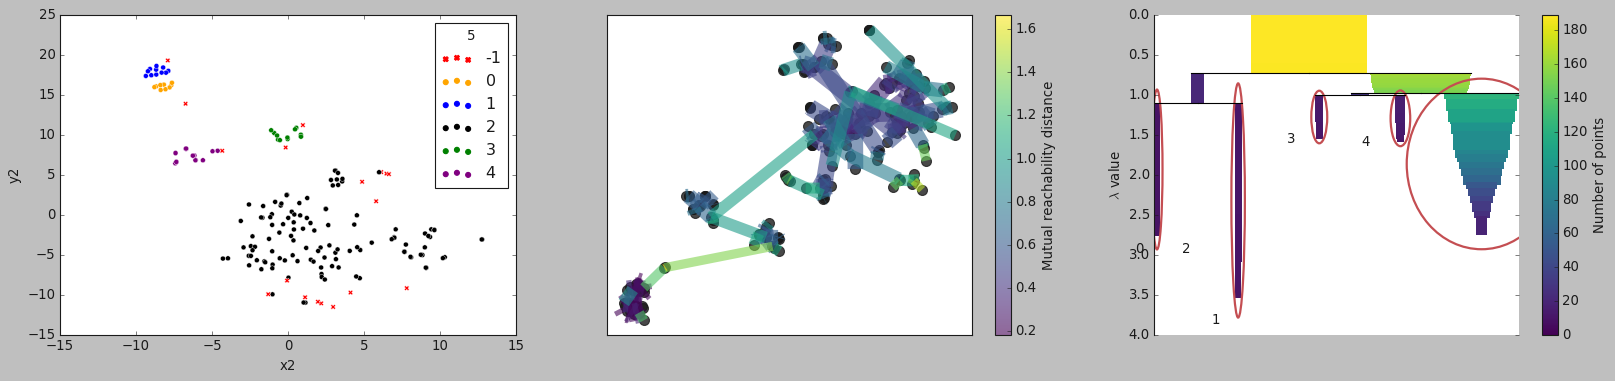

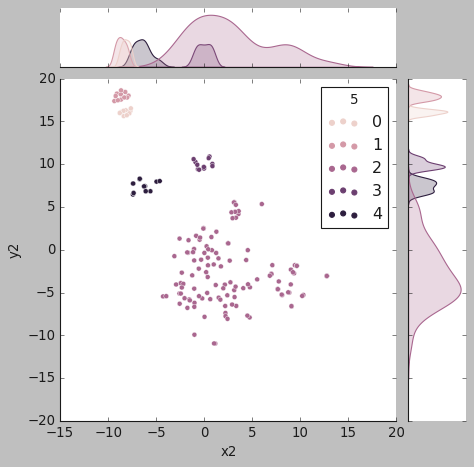

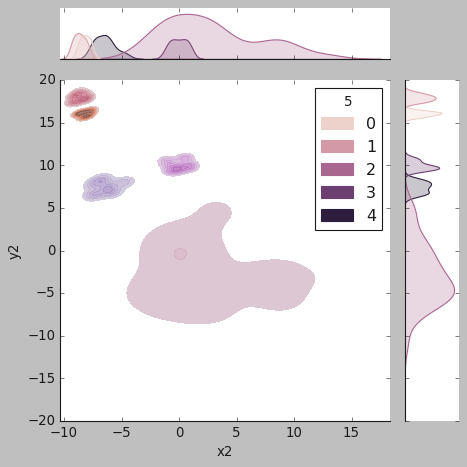

In [206]:
plot_HDBSCAN_cluster_detail( cluster_num= 5 )

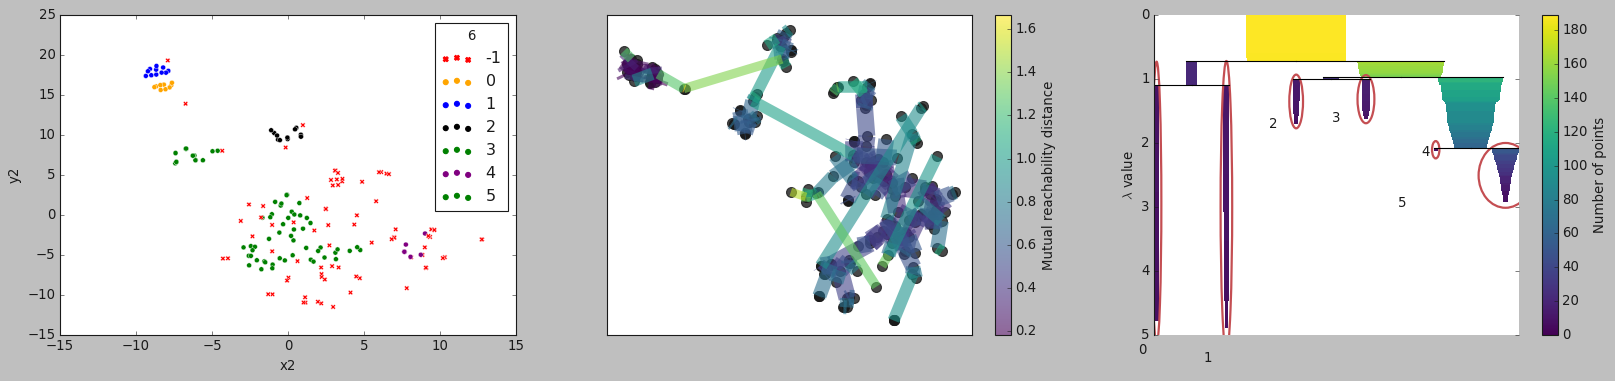

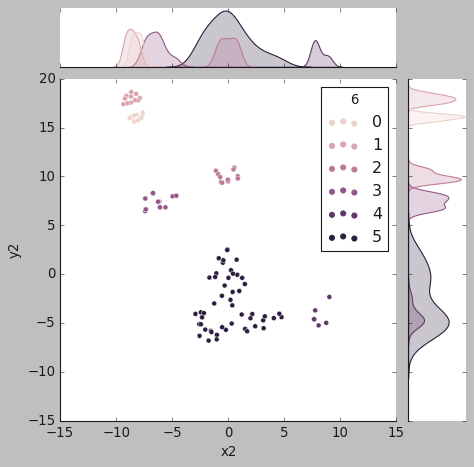

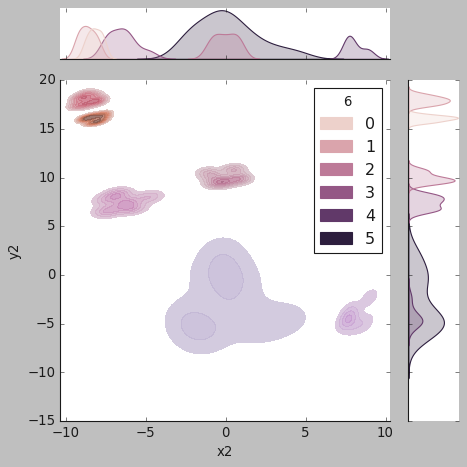

In [207]:
plot_HDBSCAN_cluster_detail( cluster_num= 6 )

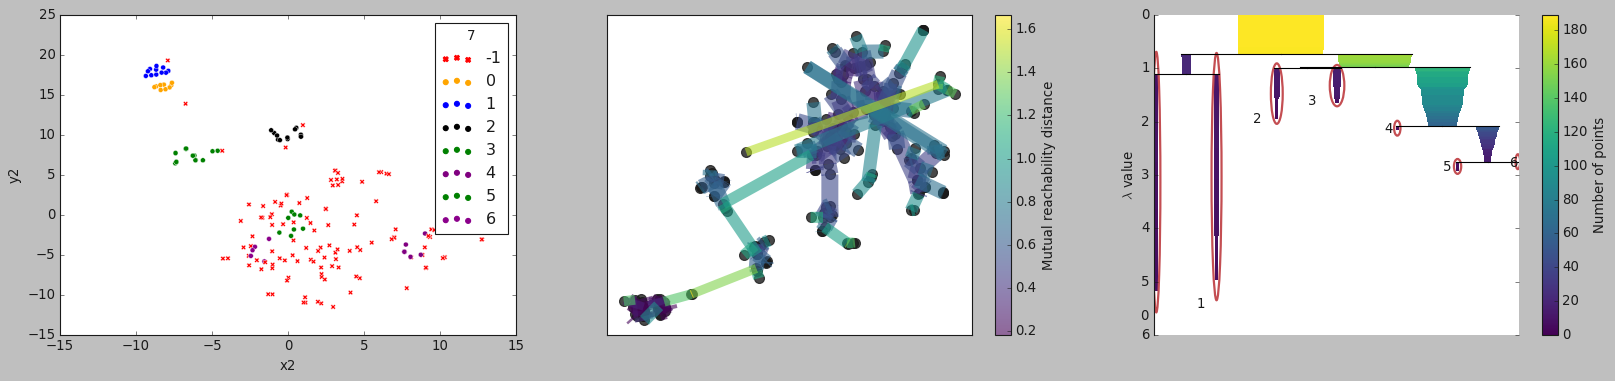

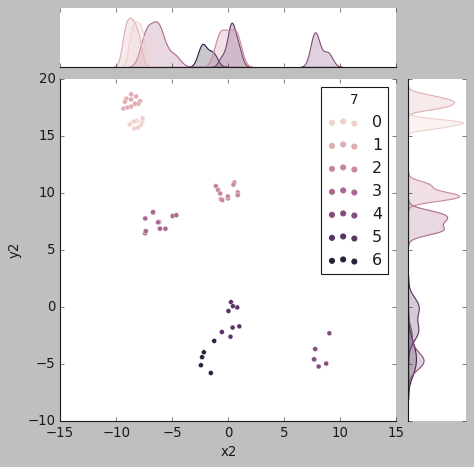

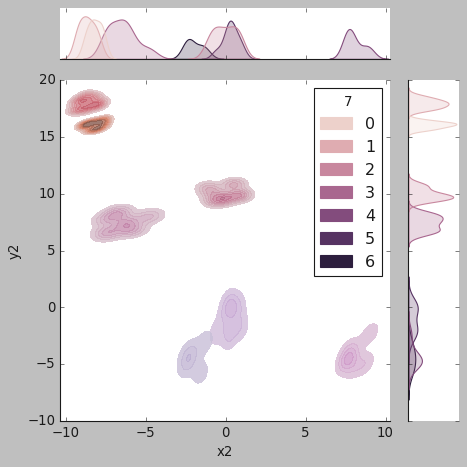

In [210]:
plot_HDBSCAN_cluster_detail( cluster_num= 7 )

In [19]:
%matplotlib inline

In [23]:
# %reset
# import utility_madhur
# !pip install pandas-datareader
# ! pip install missingno
# ! pip install fuzzywuzzy

# &emsp; &ensp; &nbsp; &thinsp;

#  import warnings; warnings.filterwarnings( action= 'ignore' )

# # to check whether a str is a python keyword
# import keyword

location = 'dataset/'
# add a directory in the system path for library import

from IPython.core.display import display, HTML
from IPython.display import display_html

display(  HTML( '<style>.container { width:99% !important; }</style>' )  )
import os, random, time, fsspec, datetime, requests, copy, itertools, sys
# import gunzip
import pandas as pd, pandas_datareader as pd_dr, re
import numpy as np, seaborn as sns
from numpy import savetxt
from numpy import genfromtxt
import sklearn, sklearn_pandas
from sklearn import *
import missingno as msno
import h5py, pickle
# import pyspark, urllib

import scipy, scipy.stats as stats, random, math
from sklearn.pipeline import Pipeline
from math import sqrt
import joblib, re

# import fuzzywuzzy
# from fuzzywuzzy import fuzz, process

import matplotlib, graphviz
import matplotlib.pyplot as plt
from matplotlib import *
# plt.style.use('Solarize_Light2')
plt.style.use( 'dark_background' )
%matplotlib inline

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost; import xgboost as xgb

import hdbscan

# keyword.iskeyword('str')
if 'E:\AI_courses\python-lib' not in sys.path:   sys.path.append( 'E:\AI_courses\python-lib' )
import DBCV

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## Set Jupyter notebook display options for pandas
pd.set_option( 'display.max_columns', None )
# pd.options.display.max_columns = 8
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 5

%matplotlib inline

%config Completer.use_jedi = False

%matplotlib inline

# <h3><p style= 'text-align:center;'>Img title</p></h3>
# <img src= 'images/split-apply-combine.png' style= 'width:917px;height:437px;'>
# m, wd, ht = 2, 990, 576; ( wd/m, ht/m  )

# <table><tr>    
# <td> <h3><p style= 'text-align:center;'>KNN </p></h3> <img src= 'images/knn_imputation.gif' alt="Drawing" style= 'width:427px;height:320px;'> </td>
# <td> <h3><p style= 'text-align:center;'>Img title</p></h3> <img src= 'images/convex_problem.png' alt="Drawing" style= 'width:977px;height:320px;'> </td>
# </tr></table>
# m, wd, ht = 2, 990, 576; ( wd/m, ht/m  )


In [2]:
import re

def clean_text(str_var):    

    '''
    clean the text, useful for column header
    Arguments:
    str_var -- a string variable of any size

    Return:
    str_modf -- a cleaned string variable
    '''
    
    # lower case and revome begin & end space
    str_modf = str_var.lower().strip()
    # replace all non word chars ( everything except letters and nos )
    str_modf = re.sub( pattern= r'[^\w\s]', repl= '_', string= str_modf )
    # replace all runs of whitespace with '_'
    str_modf = re.sub( pattern= r'\s+', repl= '_', string= str_modf )
    # repalce > 1 consecutive '_'
    str_modf = re.sub( pattern= r'[__]+', repl= '_', string= str_modf )
    # remove begining and trailing _ : '__any_word____' --> 'any_word'
    def _remove_begin_end_(str_var):
        while True:
            if str_var[-1] == '_':
                str_var = str_modf[:len(str_modf)-1]
            else: break                
        while True:
            if str_var[0] == '_':                            
                str_var = str_modf[1:len(str_modf)]
            else: break
                
        return(str_var)
    
    str_modf = _remove_begin_end_(str_modf)
    return(str_modf)    

clean_colm_name = lambda df: [ clean_text(e_cNm) for e_cNm in df.columns ]

from IPython.display import display_html

def display_side_by_side(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.to_html( )
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )  
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )   
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def display_side_by_side_head(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.head(5).to_html( )
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False ) 
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )    
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def print_tidy_JSON( json_data, indent_val = 6 ):
    print(  json.dumps( obj= json_data, indent= indent_val, sort_keys= True )  )
    
    
def get_numeric_colm( df, num= 26 ):
    '''
    returns the numeric column list (integer & float) from a dataframe
    Arguments:
        df is a dataframe
        num is the number of sampling to be considered for each column to check whether the column is numeric or not
    
    '''
    sample_num = min( len(df), num )

    numr_colm_ls = []

    for e_colm in df.columns:
        SerRndm1 = df[e_colm].dropna().sample( n= sample_num )
                
        if SerRndm1.str.isdecimal().sum() >= sample_num//2: 
            numr_colm_ls.append(e_colm)
            
        else:
            float_sum = 0
            for e_row in SerRndm1:
                try: float(e_row); float_sum += 1
                except: pass
                    
            if float_sum >= sample_num: numr_colm_ls.append(e_colm)
            
    return(numr_colm_ls)